In [1]:
#importing all the necessary libraries


import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings:
import warnings
warnings.filterwarnings('ignore')

#import pandas_profiling package for a quick overview of the dataset (Please install this package)
import pandas_profiling as pp

# To Scale our data
from sklearn.preprocessing import scale


# To display all the rows and columns:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#importing the data

lead_df=pd.read_csv(r'D:\Upgrad\Lead Scoring Assignment\Leads.csv')

In [3]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags      Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses  Low in Relevance                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing               NaN                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                             Select                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email          Might be                                No                        No  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing          Not S

In [4]:
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Asymmetrique Activity Score  Asymmetrique Profile Score
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000                  5022.000000                 5022.000000
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820                    14.306252                   16.344883
std     23405.995698     0.486714     4.854853                   548.021466              2.161418                     1.386694                    1.811395
min    579533.000000     0.000000     0.000000                     0.000000              0.000000                     7.000000                   11.000000
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000                    14.000000                   15.000000
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000                    14.000000                   16.000000
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000                    15.000000                   18.000000
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000                    18.000000                   20.000000

In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
lead_df.shape


(9240, 37)

In [7]:
#A detailed report of the leads dataset:

pp.ProfileReport(lead_df)

# From the report displayed above :
1.Number of variables-37 <br>
2.Number of observations-9240 <br>
3.Total Missing (%)-12.0% <br>

# Details about the variables that have missing values:

1.Asymmetrique Activity Index has 4218 / 45.6% missing values <br>
2.Asymmetrique Activity Score has 4218 / 45.6% missing values <br>
3.Asymmetrique Profile Index has 4218 / 45.6% missing values <br>
4.Asymmetrique Profile Score has 4218 / 45.6% missing values <br>
5.City has 1420 / 15.4% missing values <br>
6.Country has 2461 / 26.6% missing values <br>
7.How did you hear about X Education has 2207 / 23.9% missing values <br>
8.Last Activity has 103 / 1.1% missing values <br>
9.Lead Profile has 2709 / 29.3% missing values <br>
10.Lead Quality has 4767 / 51.6% missing values <br>
11.Page Views Per Visit has 137 / 1.5% missing values<br>
12.Specialization has 1438 / 15.6% missing values <br>
13.Tags has 3353 / 36.3% missing values <br> 
14.TotalVisits has 137 / 1.5% missing values <br>
15.What is your current occupation has 2690 / 29.1% missing values<br> 
16.What matters most to you in choosing a course has 2709 / 29.3% missing values<br> 


# Data Cleaning/Preparation:

Dropping all columns that have more than 45% missing values except for lead quality because it can tell us more about a lead. <br>


In [8]:
# dropping Asymmetrique Activity Index(45.6%)

lead_df.drop(['Asymmetrique Activity Index'],axis=1,inplace=True)

In [9]:
# dropping Asymmetrique Activity Score(45.6%)

lead_df.drop(['Asymmetrique Activity Score'],axis=1,inplace=True)

In [10]:
# dropping Asymmetrique Profile Index(45.6%)

lead_df.drop(['Asymmetrique Profile Index'],axis=1,inplace=True)

In [11]:
# dropping Asymmetrique Profile Score(45.6%)

lead_df.drop(['Asymmetrique Profile Score'],axis=1,inplace=True)

In [12]:
#checking % of missing values again after dropping :

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Imputing values in columns:

In [13]:
# 1.To see how to impute values in the 'Lead Quality' column:

lead_df['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

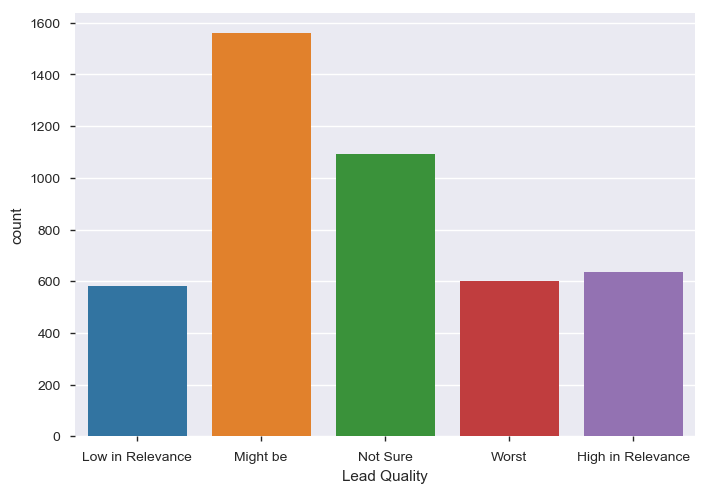

In [14]:
sns.countplot(lead_df['Lead Quality'])

From the above graph it is seen that there is a value 'Not Sure' which is as good as a Null value. So all NaN values can be replaced by 'Not Sure'. 

In [15]:
lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan, 'Not Sure')

In [16]:
# 2.To see how to impute values in the 'Tags' column:

lead_df['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

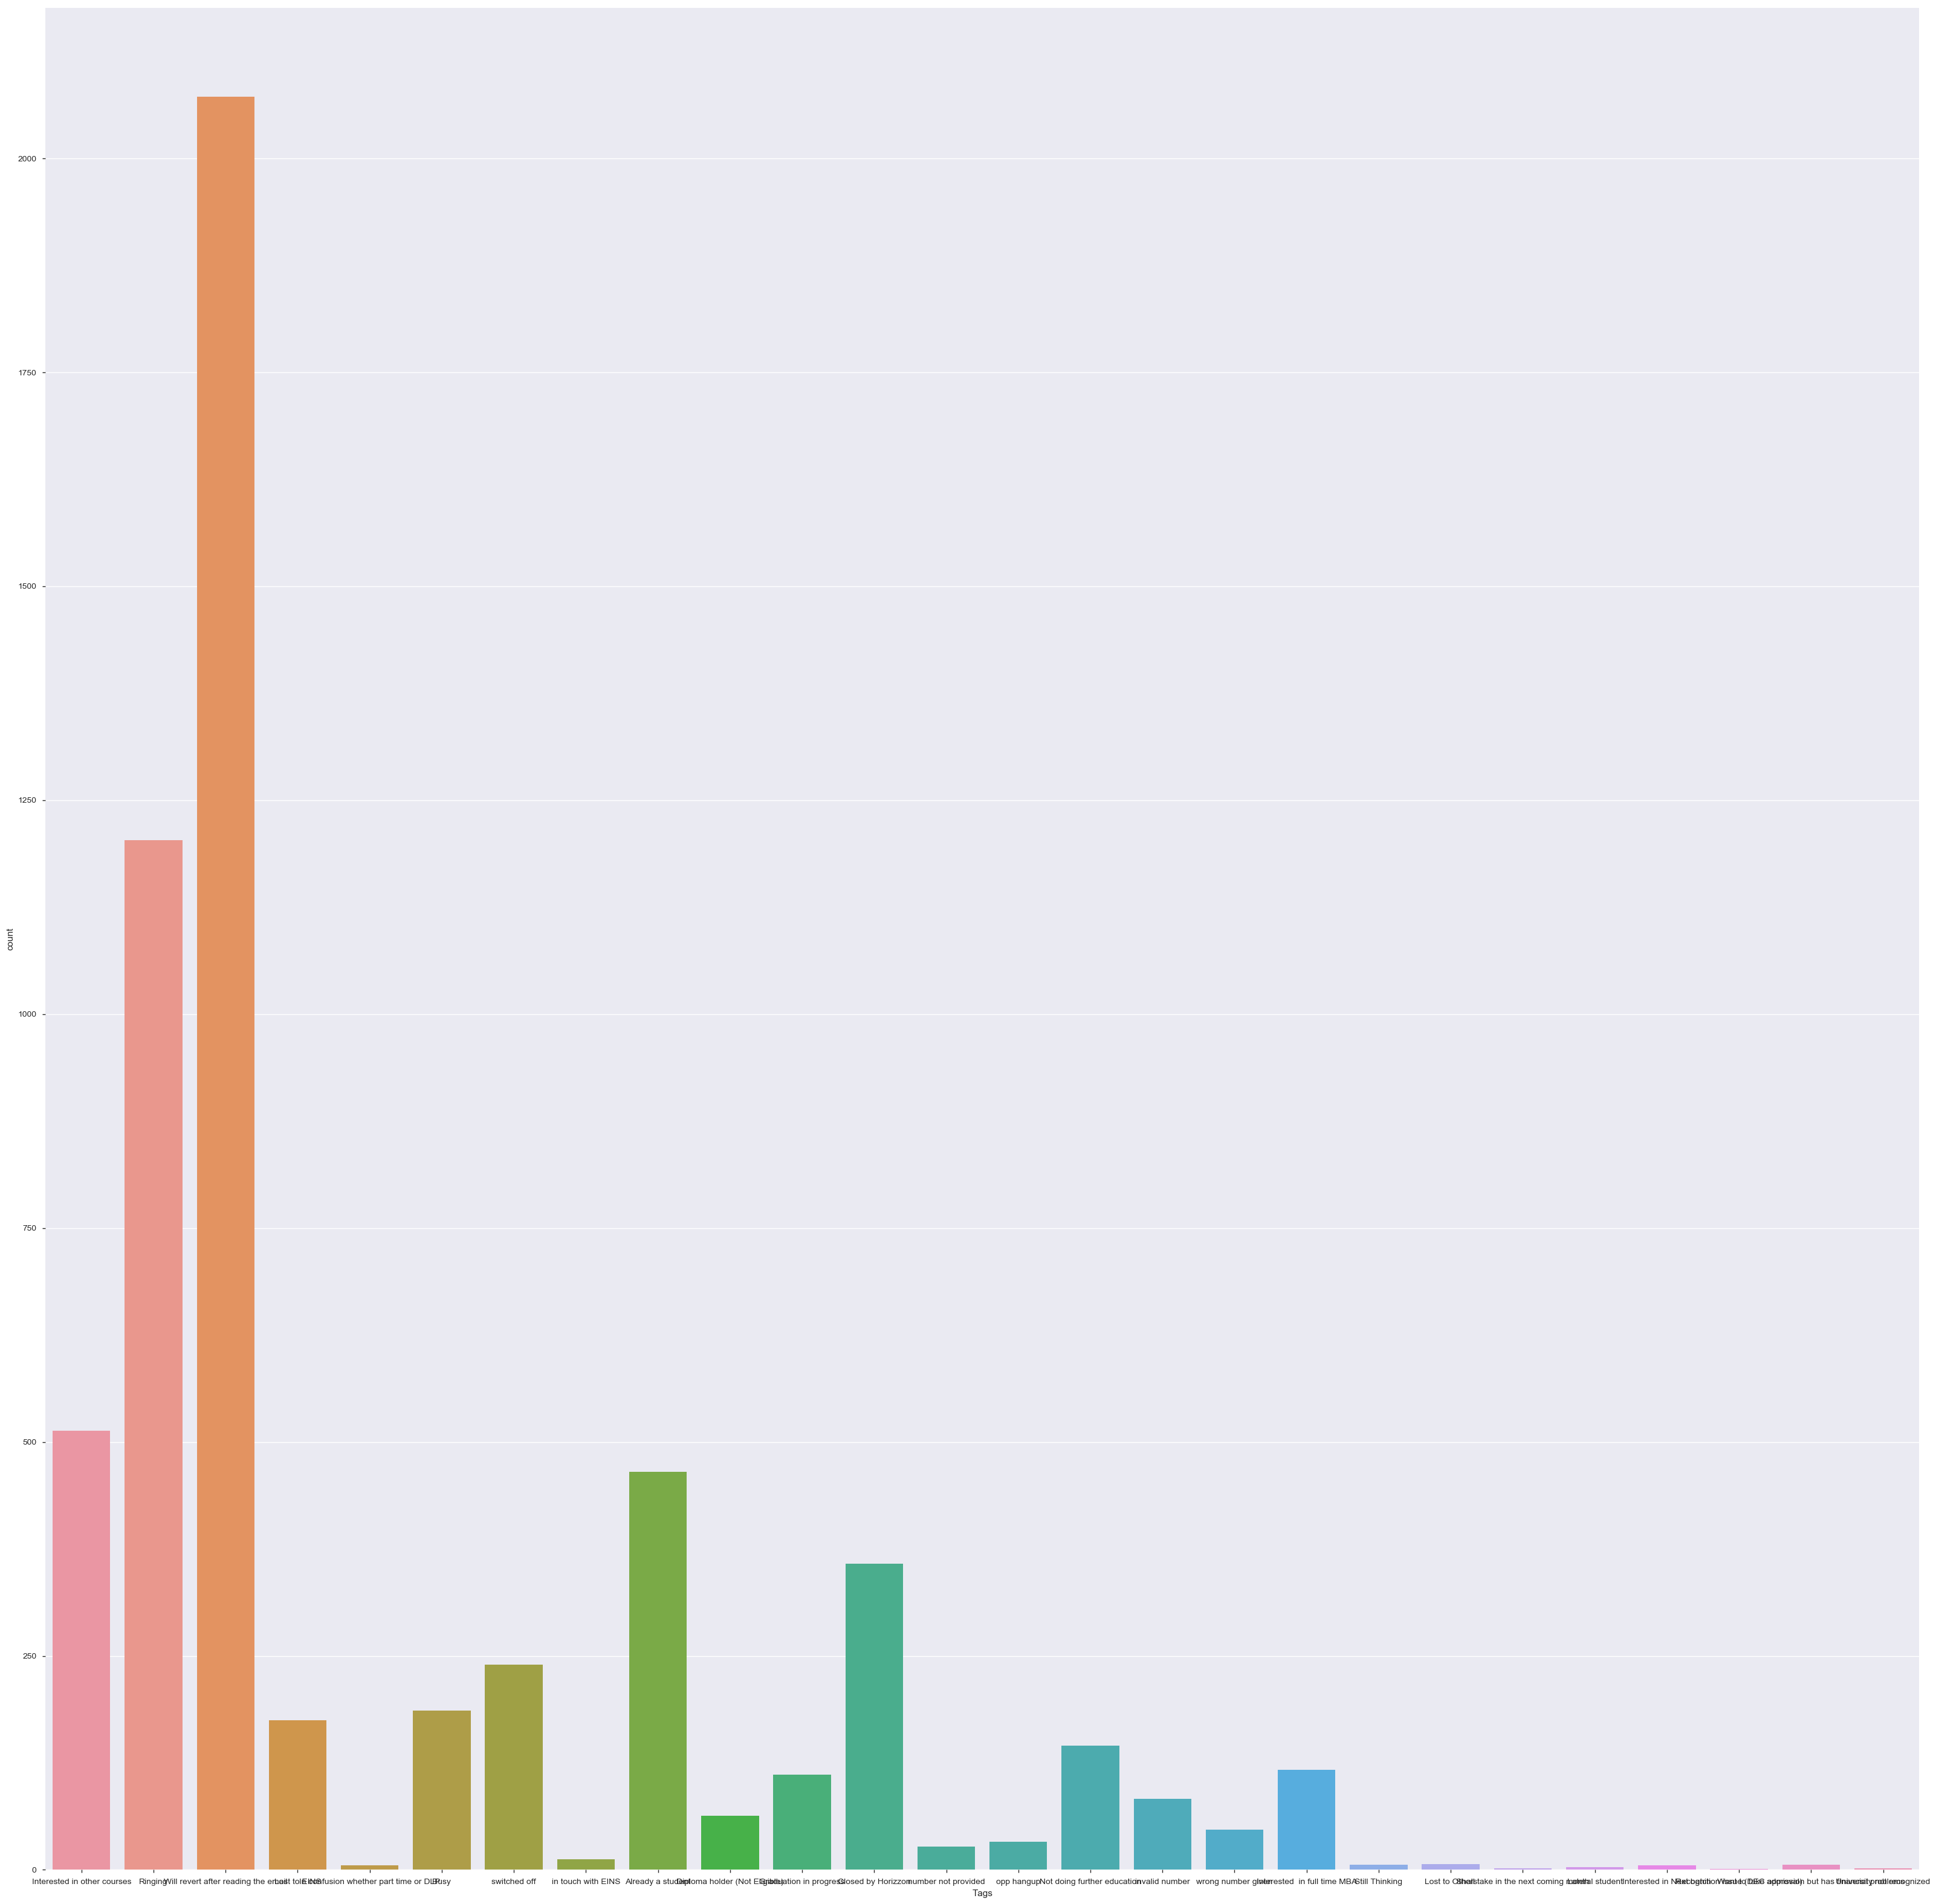

In [17]:
plt.figure(num=None, figsize=(40, 40))
sns.countplot(lead_df['Tags'])

The Tag column indicates the current status of the lead.So the missing values might mean that the lead  will revert after reading the email.

In [18]:
# Replacing missing values with 'Will revert after reading the email':

lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Will revert after reading the email')

In [19]:
# 3.To see how to impute values in the 'Lead Profile' column:

lead_df['Lead Profile'].describe()

count       6531
unique         6
top       Select
freq        4146
Name: Lead Profile, dtype: object

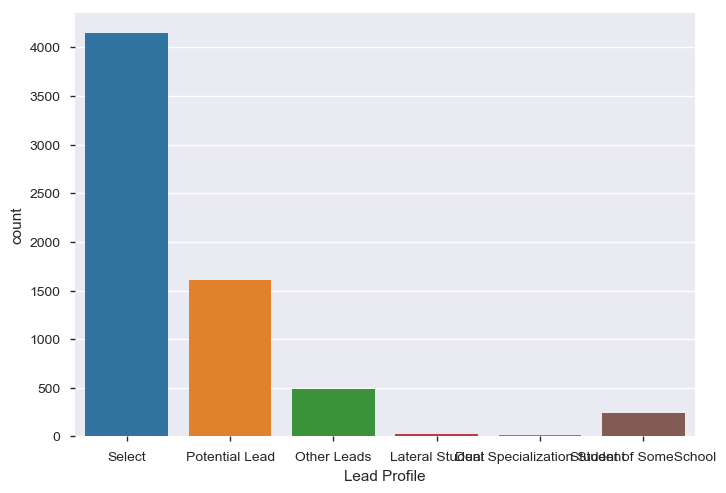

In [20]:
sns.countplot(lead_df['Lead Profile'])

According to the problem statement the Select values have to be treated as null values.

In [21]:
#Replacing all Select values with Null values:

lead_df['Lead Profile'] = lead_df['Lead Profile'].replace('Select',np.nan)

In [22]:
#checking % of missing values in the column Lead Profile:

round(100*(lead_df['Lead Profile'].isnull().sum()/len(lead_df['Lead Profile'].index)), 2)

74.19

Now the Column Lead Profile has 74.19% missing values. So it can be dropped.

In [23]:
#Dropping the Lead Profile column:

lead_df.drop(['Lead Profile'],axis=1,inplace=True)

In [24]:
# 4.To see how to impute values in the 'What matters most to you in choosing a course' column:

lead_df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

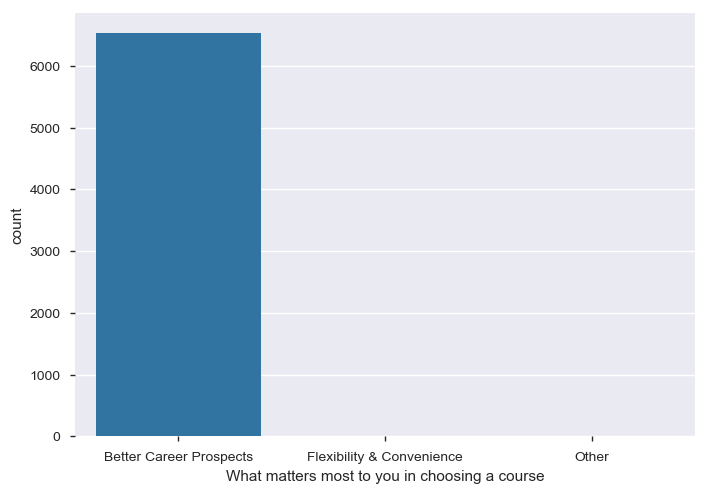

In [25]:
sns.countplot(lead_df['What matters most to you in choosing a course'])

Replacing all NaN values with 'Better Career Prospects' as this value as the highest count in this column.



In [26]:
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [27]:
# 5.To see how to impute values in the 'What is your current occupation' column:

lead_df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

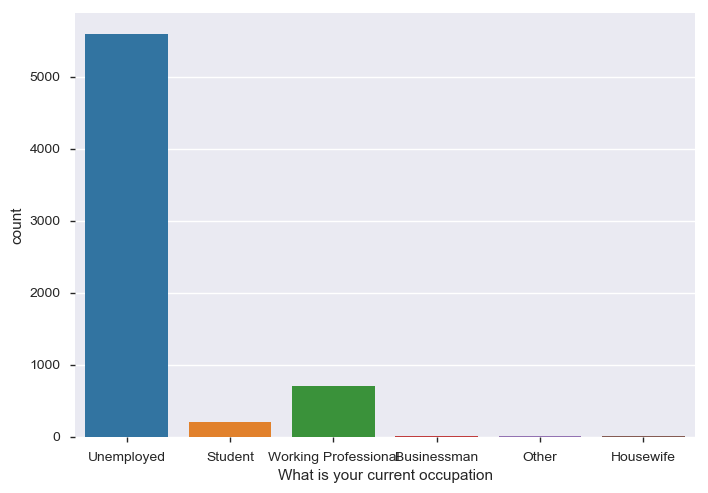

In [28]:
sns.countplot(lead_df['What is your current occupation'])

Replacing all NaN values with 'Unemployed' as this value as the highest count in this column.


In [29]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [30]:
#checking % of missing values again:

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [31]:
# 6.To see how to impute values in the 'Country' column:

lead_df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

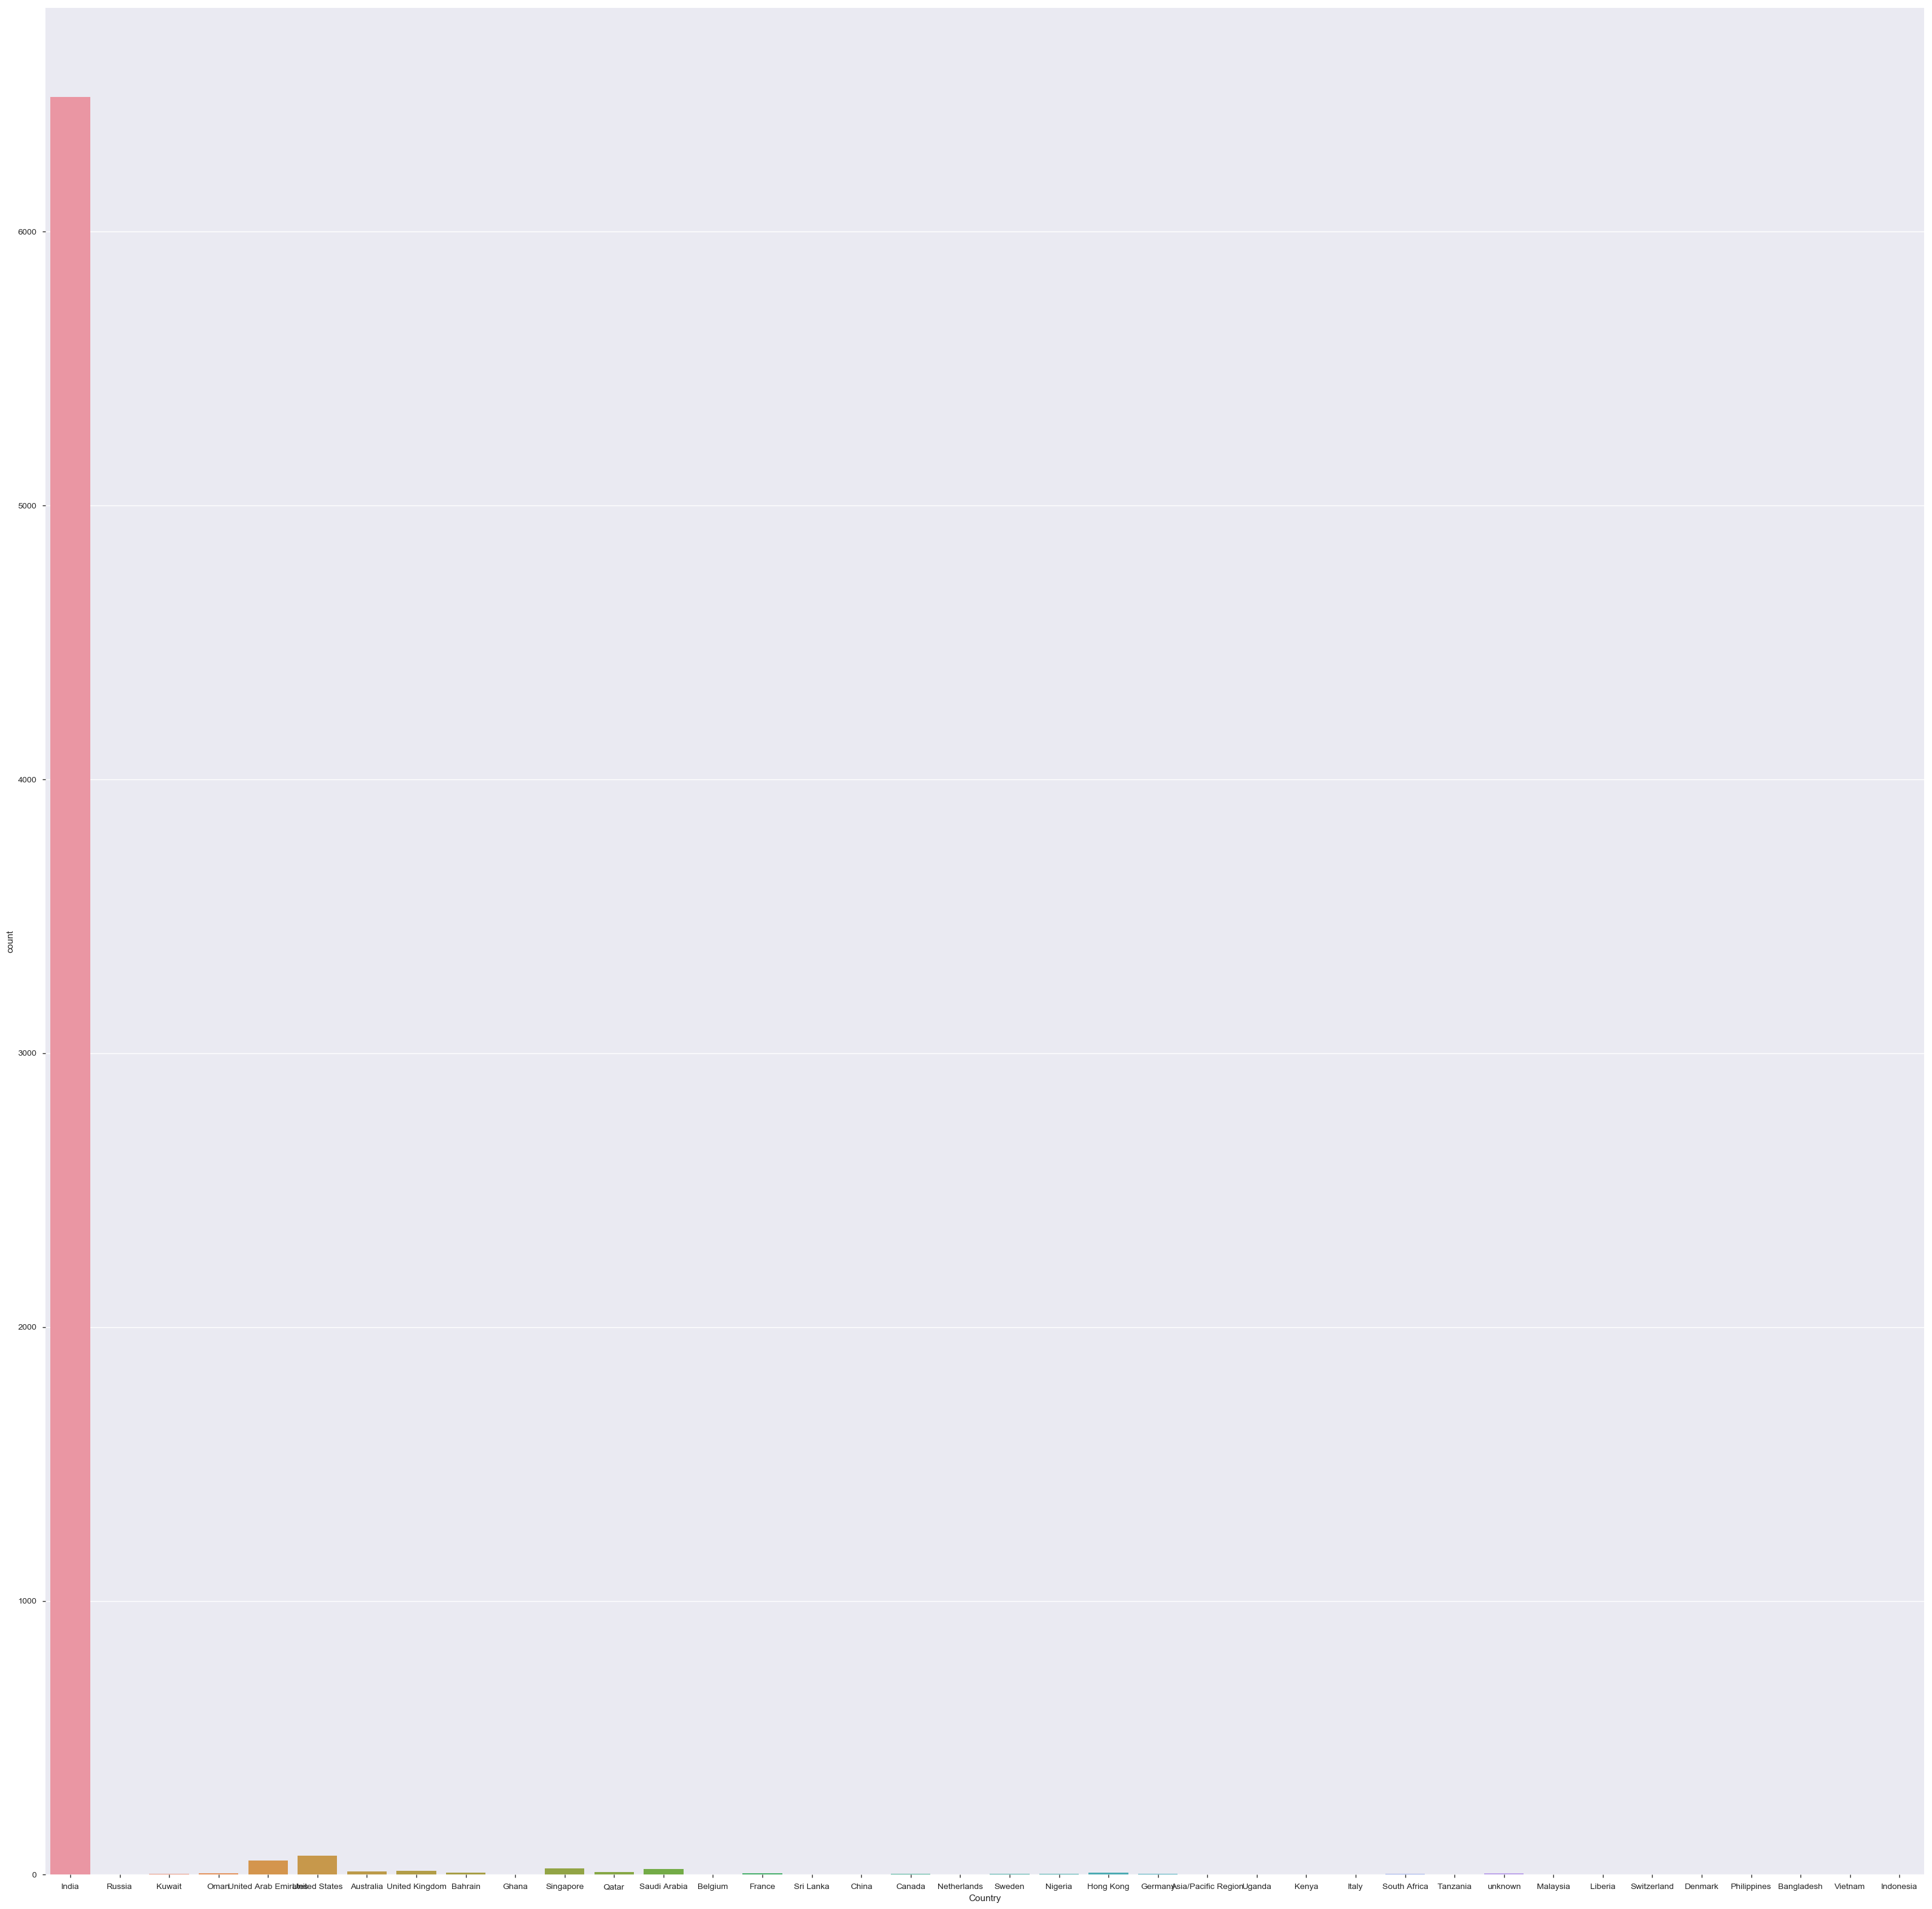

In [32]:
plt.figure(num=None, figsize=(40, 40))
sns.countplot(lead_df['Country'])

Replacing all NaN values with 'India' as this value as the highest count in this column.


In [33]:
lead_df['Country'] = lead_df['Country'].replace(np.nan,'India')

In [34]:
# 7.To see how to impute values in the 'How did you hear about X Education' column:

lead_df['How did you hear about X Education'].describe()

count       7033
unique        10
top       Select
freq        5043
Name: How did you hear about X Education, dtype: object

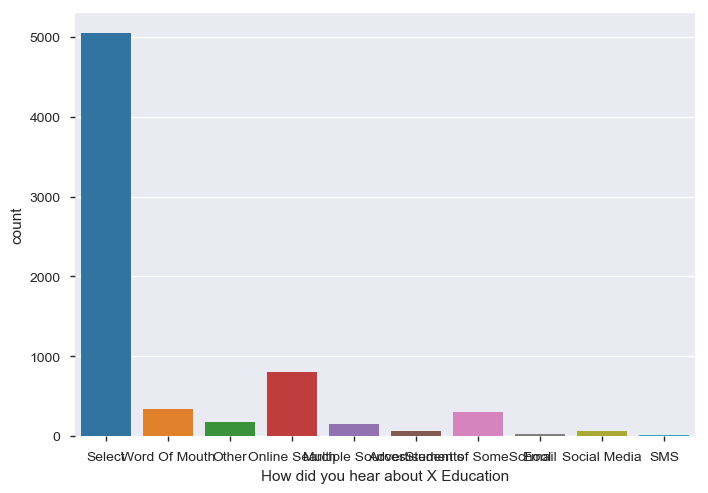

In [35]:
sns.countplot(lead_df['How did you hear about X Education'])

In [36]:
#Replacing Select with NaN:

lead_df['How did you hear about X Education'] = lead_df['How did you hear about X Education'].replace('Select',np.nan)

In [37]:
#Finding the % of missing values now:

round(100*(lead_df['How did you hear about X Education'].isnull().sum()/len(lead_df['How did you hear about X Education'].index)), 2)

78.46

The percentage of missing value for the column 'How did you hear about X Education' is 78.46%. So this column can be dropped.

In [38]:
# Dropping the How did you hear about X Education column.

lead_df.drop(['How did you hear about X Education'],axis=1,inplace=True)

In [39]:
# 8.To see how to impute values in the 'Specialization' column:

lead_df['Specialization'].describe()

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

In [40]:
# Replacing Select with NaN:

lead_df['Specialization'] = lead_df['Specialization'].replace('Select',np.nan)

In [41]:
#Finding the % of missing values now:

round(100*(lead_df['Specialization'].isnull().sum()/len(lead_df['Specialization'].index)), 2)

36.58

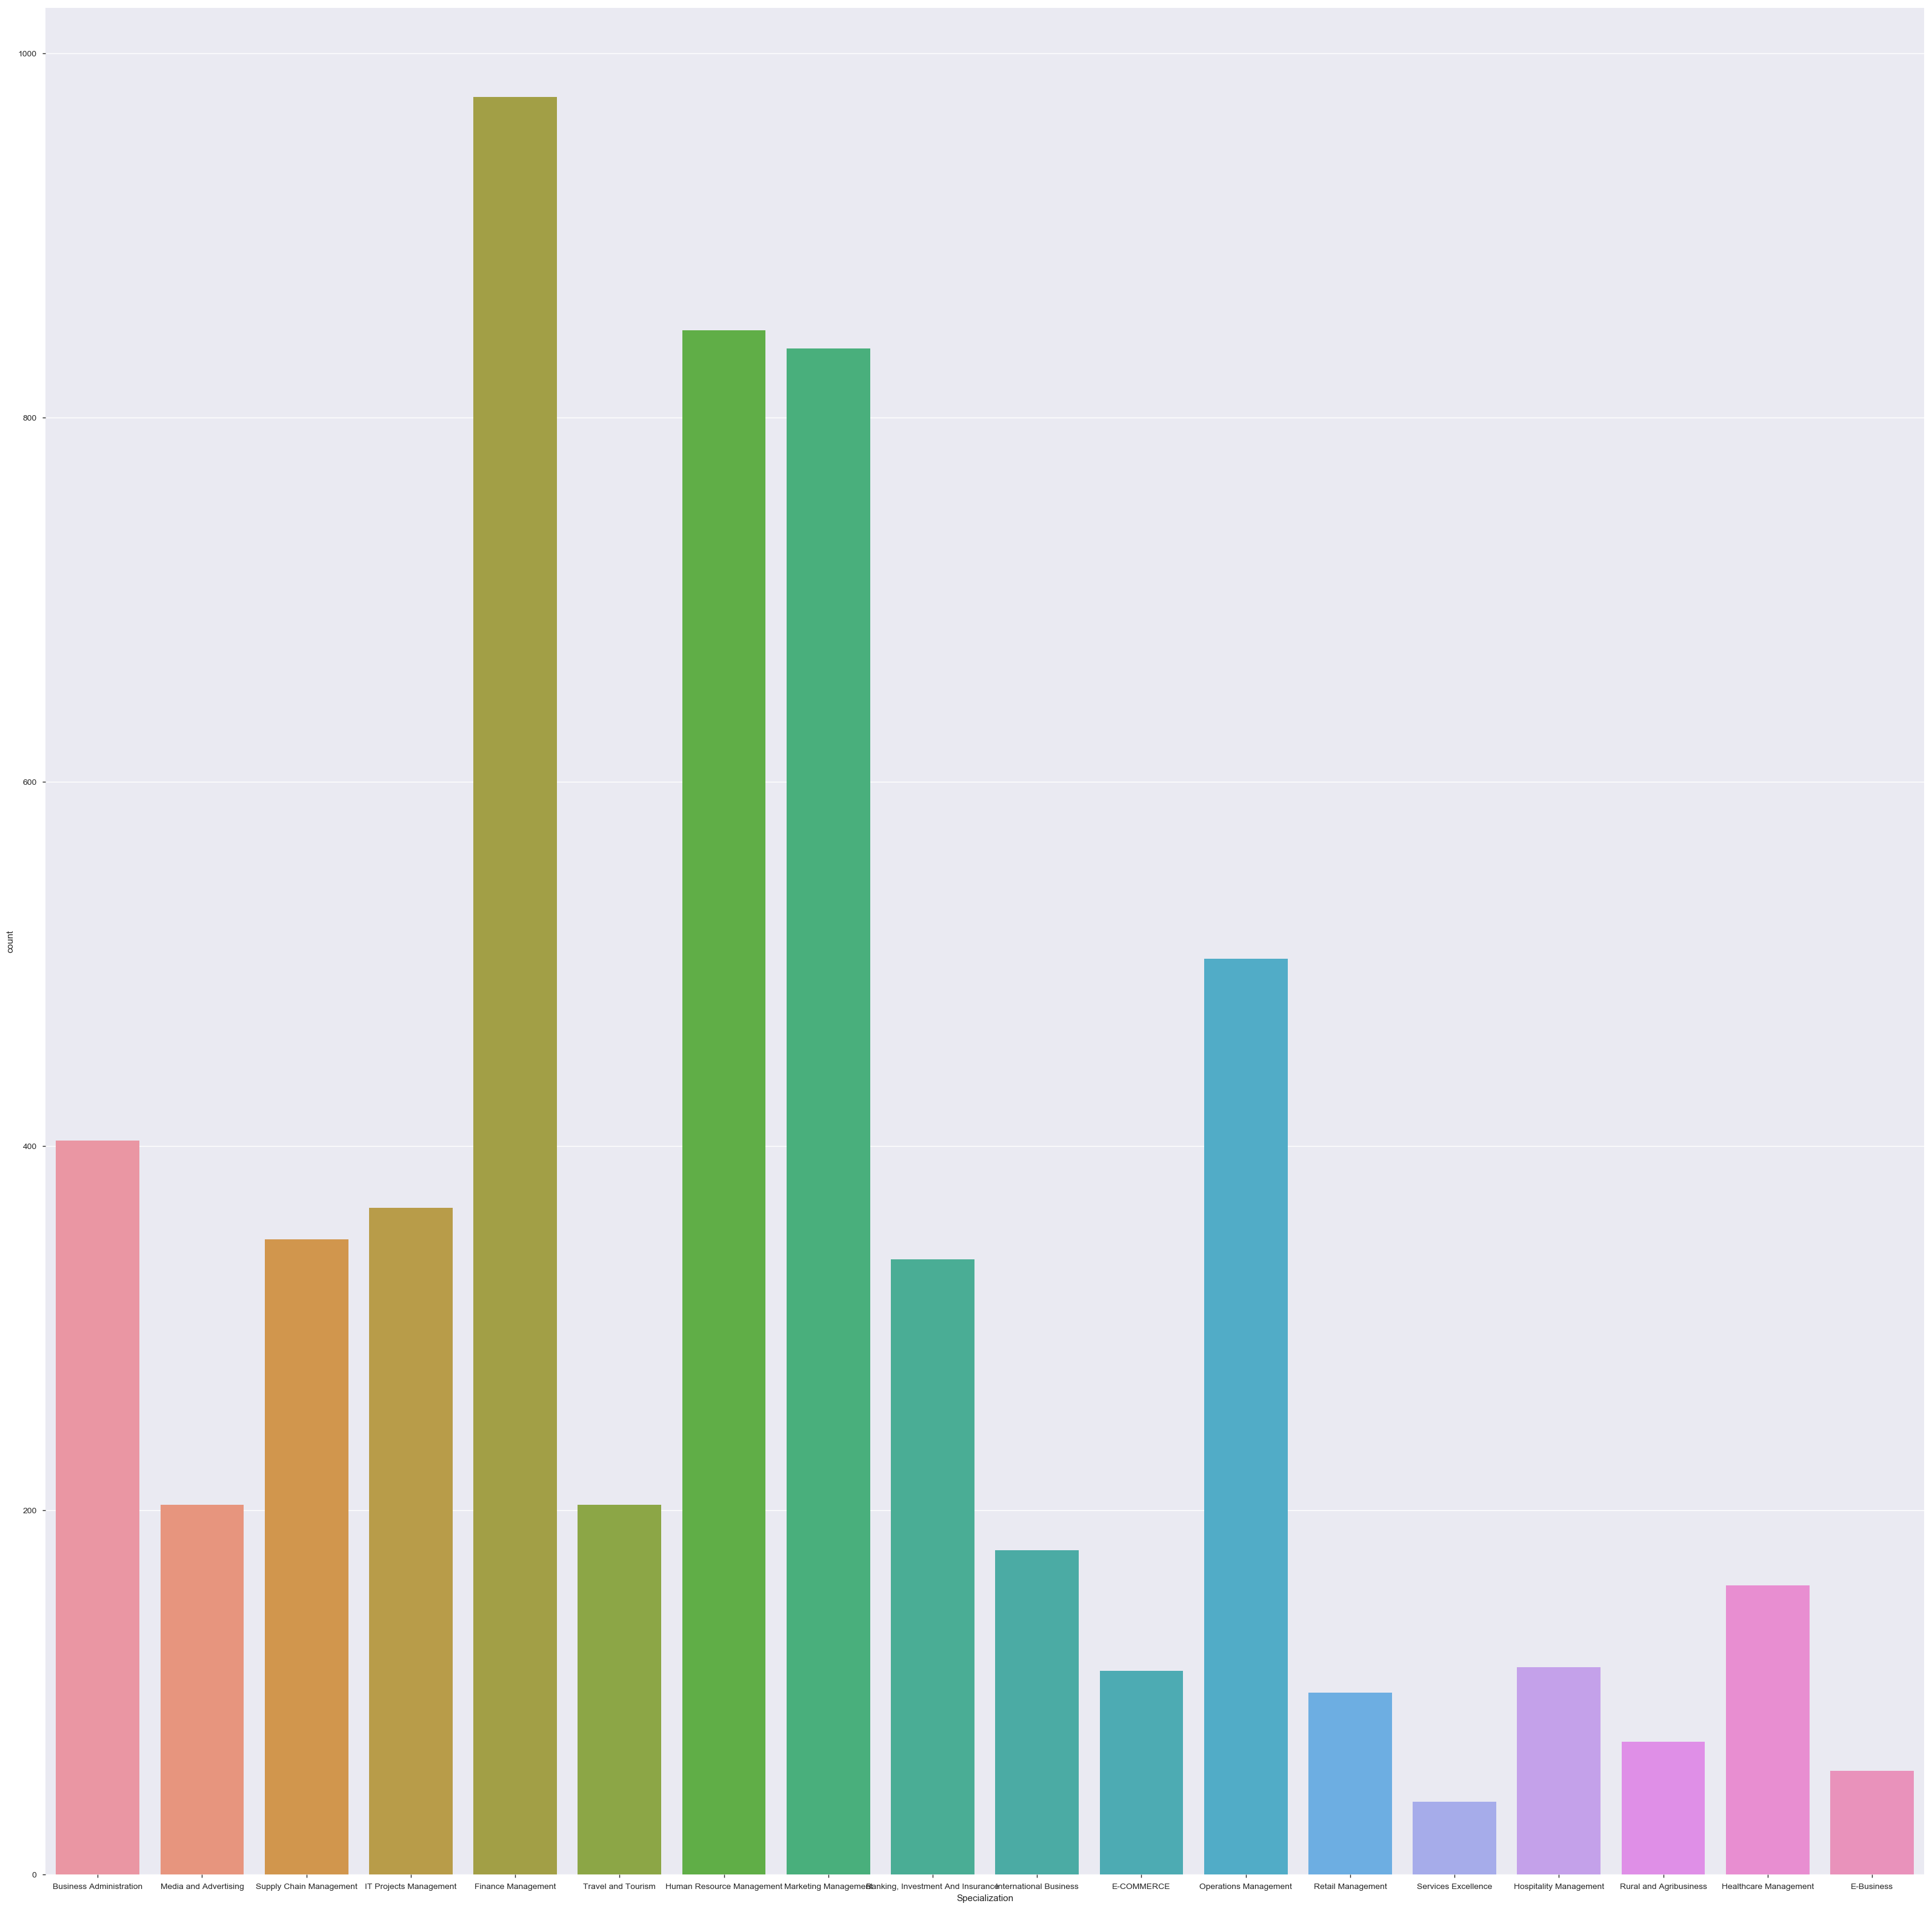

In [42]:
plt.figure(figsize=(40, 40))
sns.countplot(lead_df['Specialization'])

The missing values in this column can be put under one label('Others') because the lead might have a different specialization which is not available in the given options. 

In [43]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others')

In [44]:
# 9.To see how to impute values in the 'City' column:

lead_df['Specialization'].describe()

count       9240
unique        19
top       Others
freq        3380
Name: Specialization, dtype: object

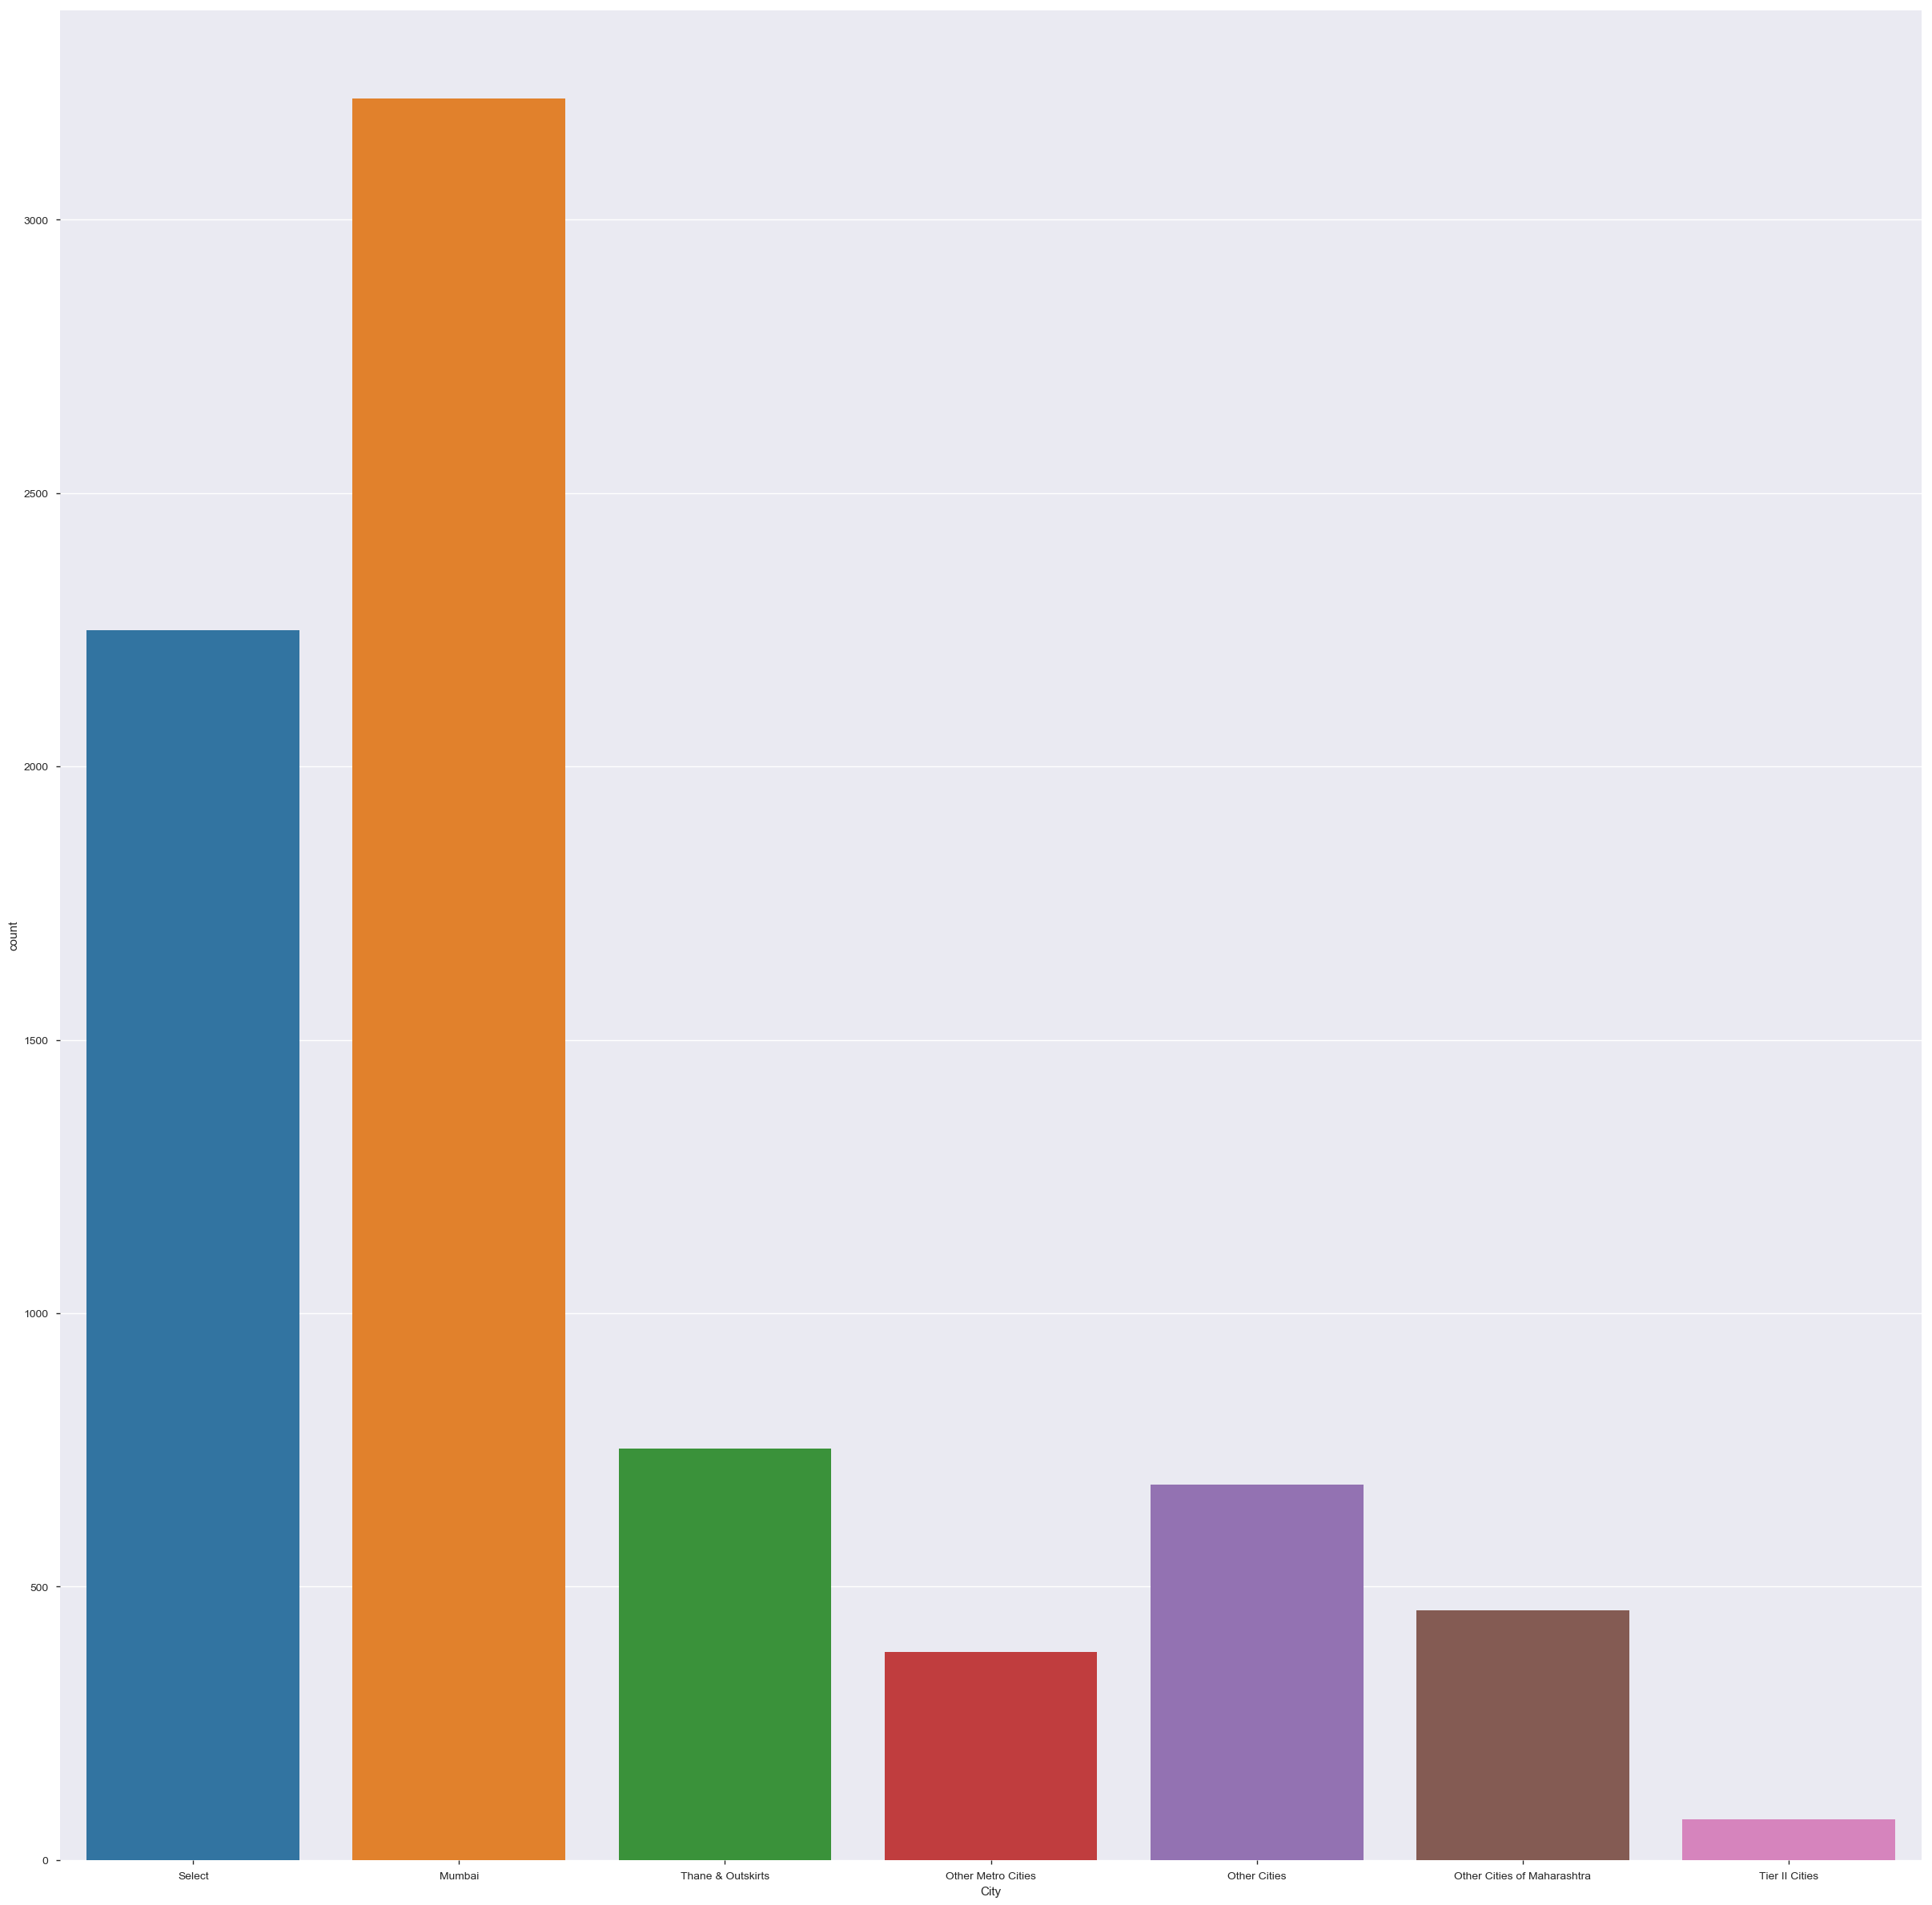

In [45]:
plt.figure(figsize=(30, 30))
sns.countplot(lead_df['City'])

In [46]:
#Replacing Select with NaN:

lead_df['City'] = lead_df['City'].replace('Select',np.nan)

In [47]:
#Finding the % of missing values now:

round(100*(lead_df['City'].isnull().sum()/len(lead_df['City'].index)), 2)

39.71

The percentage of missing value for the column 'City' is 39.71%.Replacing all missing values with Mumbai as it has the highest count.

In [48]:
lead_df['City'] = lead_df['City'].replace(np.nan,'Mumbai')

In [49]:
# 10.To see how to impute values in the 'Page Views Per Visit' column:

lead_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [50]:
#Replacing the missing values with the mean of the column
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].replace(np.nan,np.mean)

In [51]:
# 11.To see how to impute values in the 'TotalVisits' column:

lead_df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [52]:
#Replacing the missing values with the mean of the column
lead_df['TotalVisits'] = lead_df['TotalVisits'].replace(np.nan,np.mean)

In [53]:
# 12.To see how to impute values in the 'Last Activity' column:

lead_df['Last Activity'].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

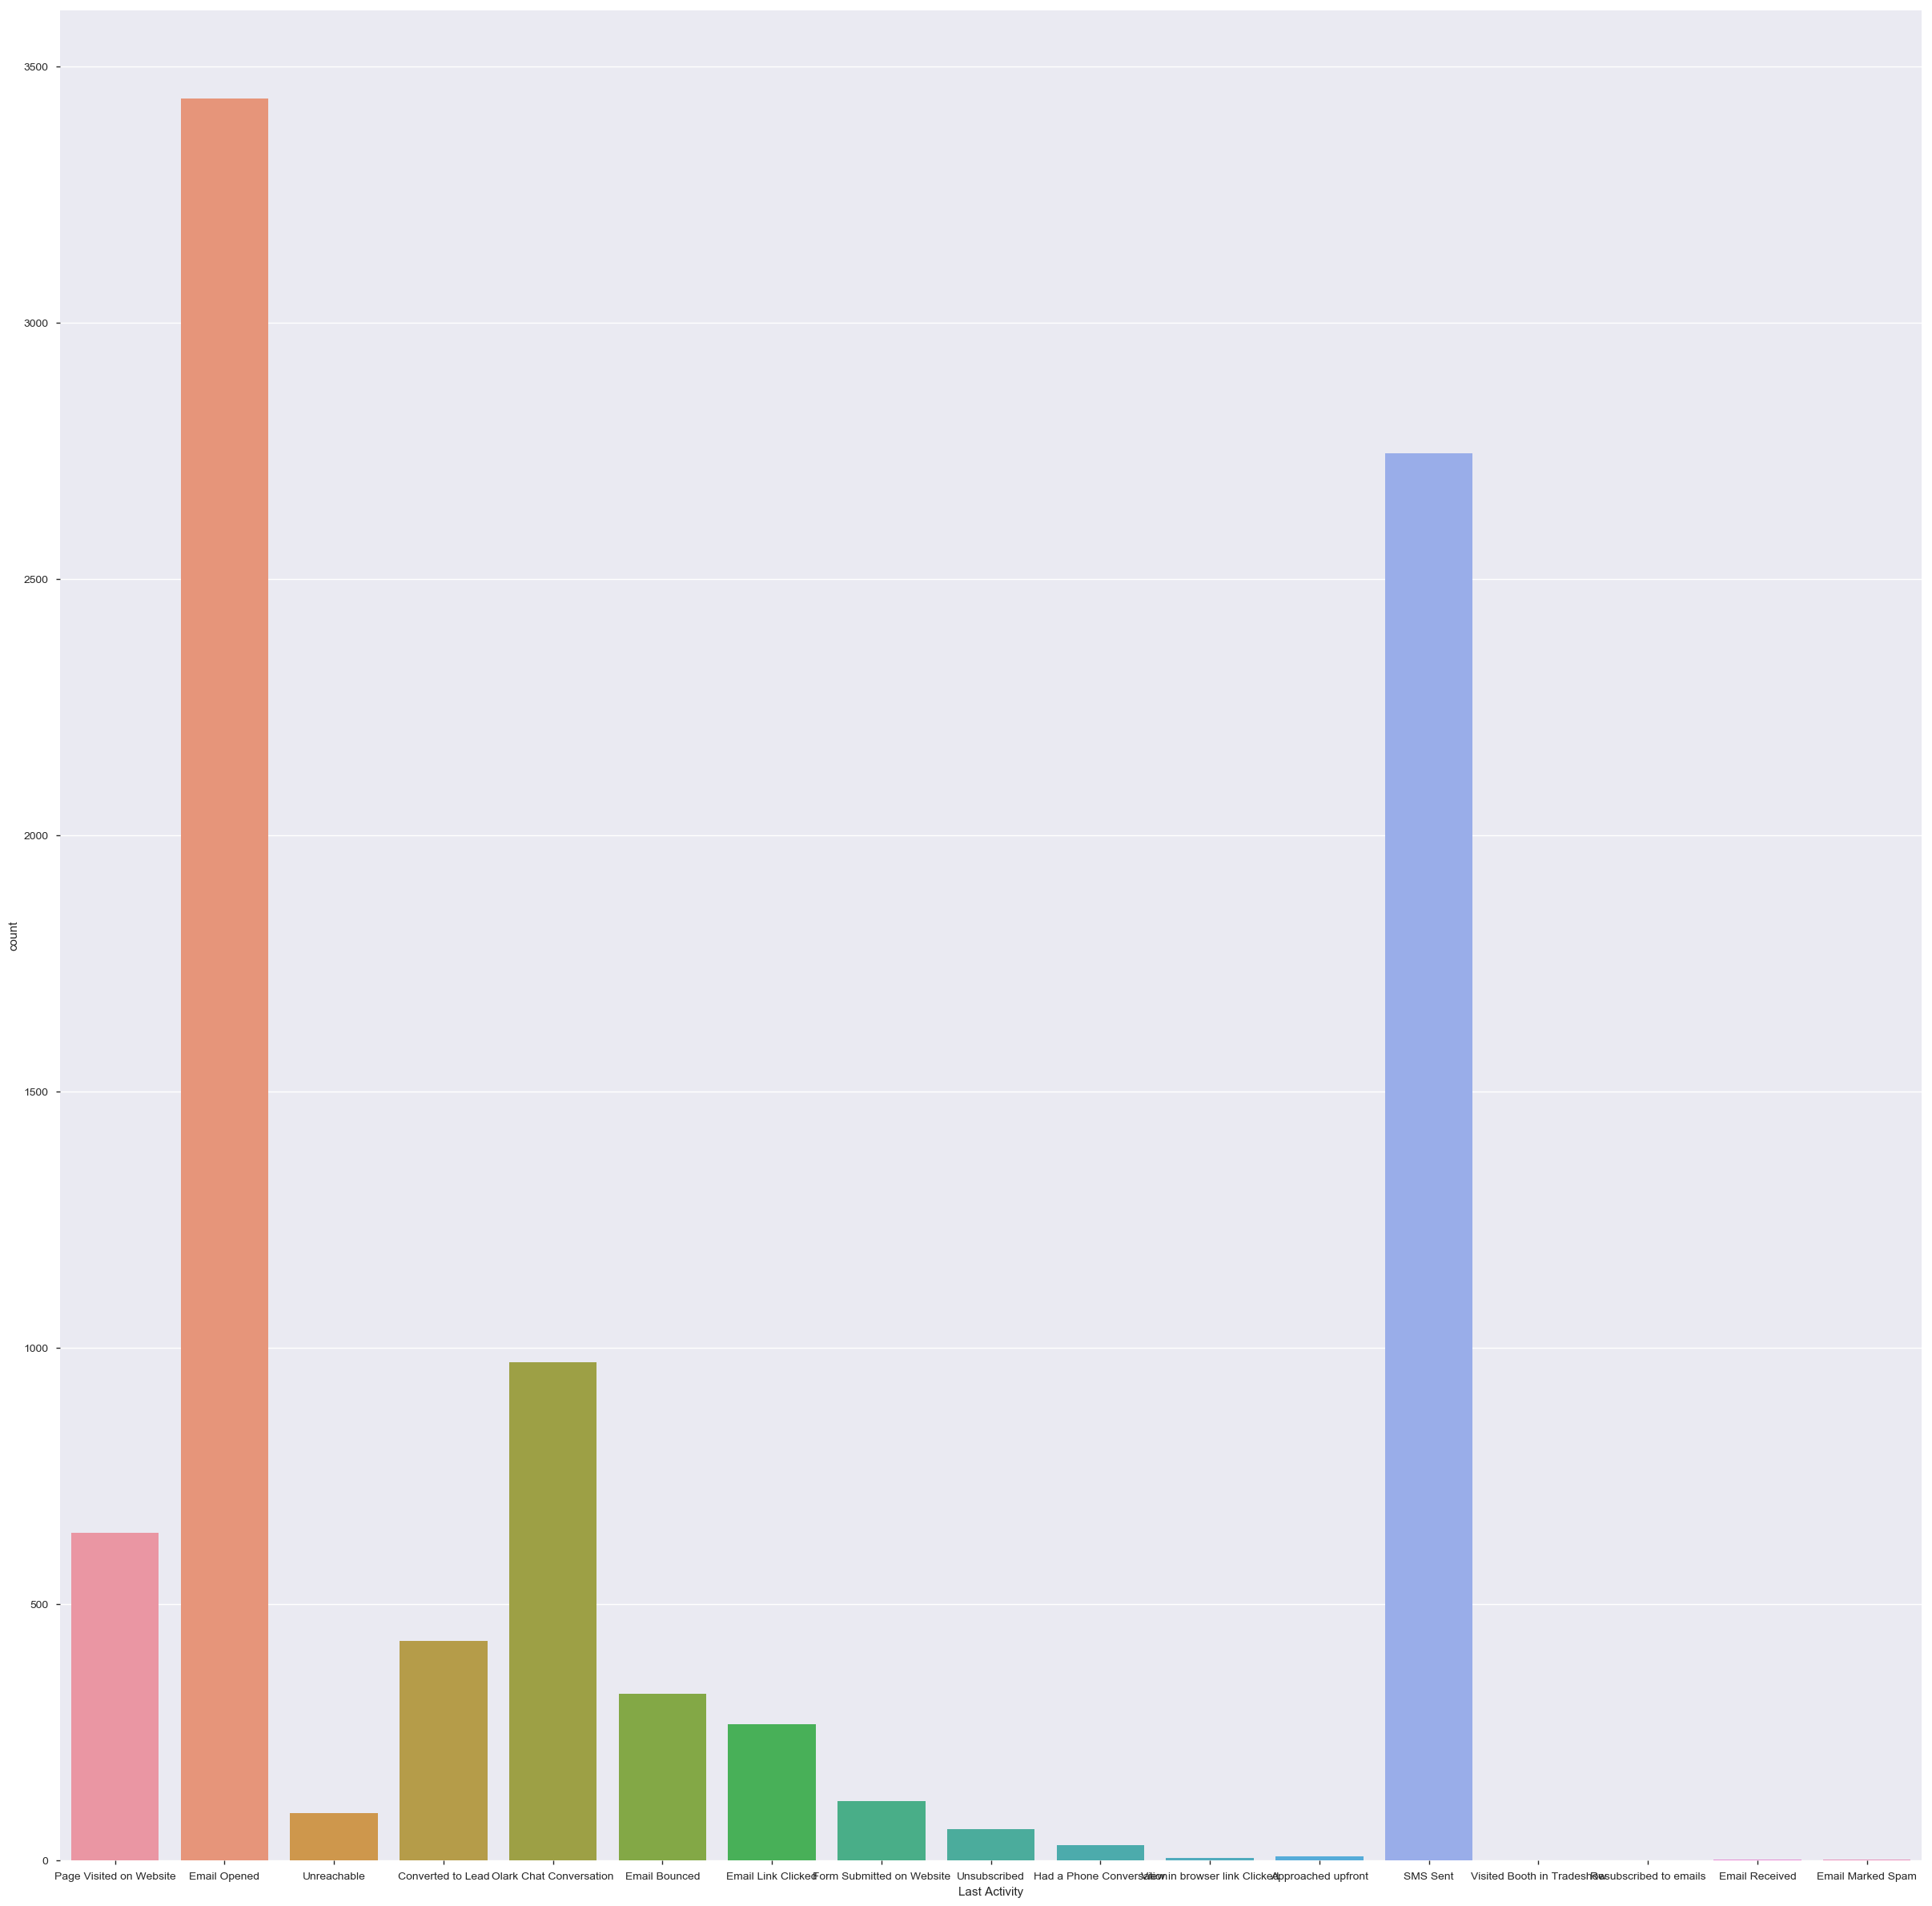

In [54]:
plt.figure(figsize=(30, 30))
sns.countplot(lead_df['Last Activity'])

Last activity is the last action performed by the customer.The missing values in this column can be put under ('Email Marked Spam').

In [55]:
#Replacing the missing values
lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan,'Email Marked Spam')

In [56]:
# 13.To see how to impute values in the 'Lead Source' column:

lead_df['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

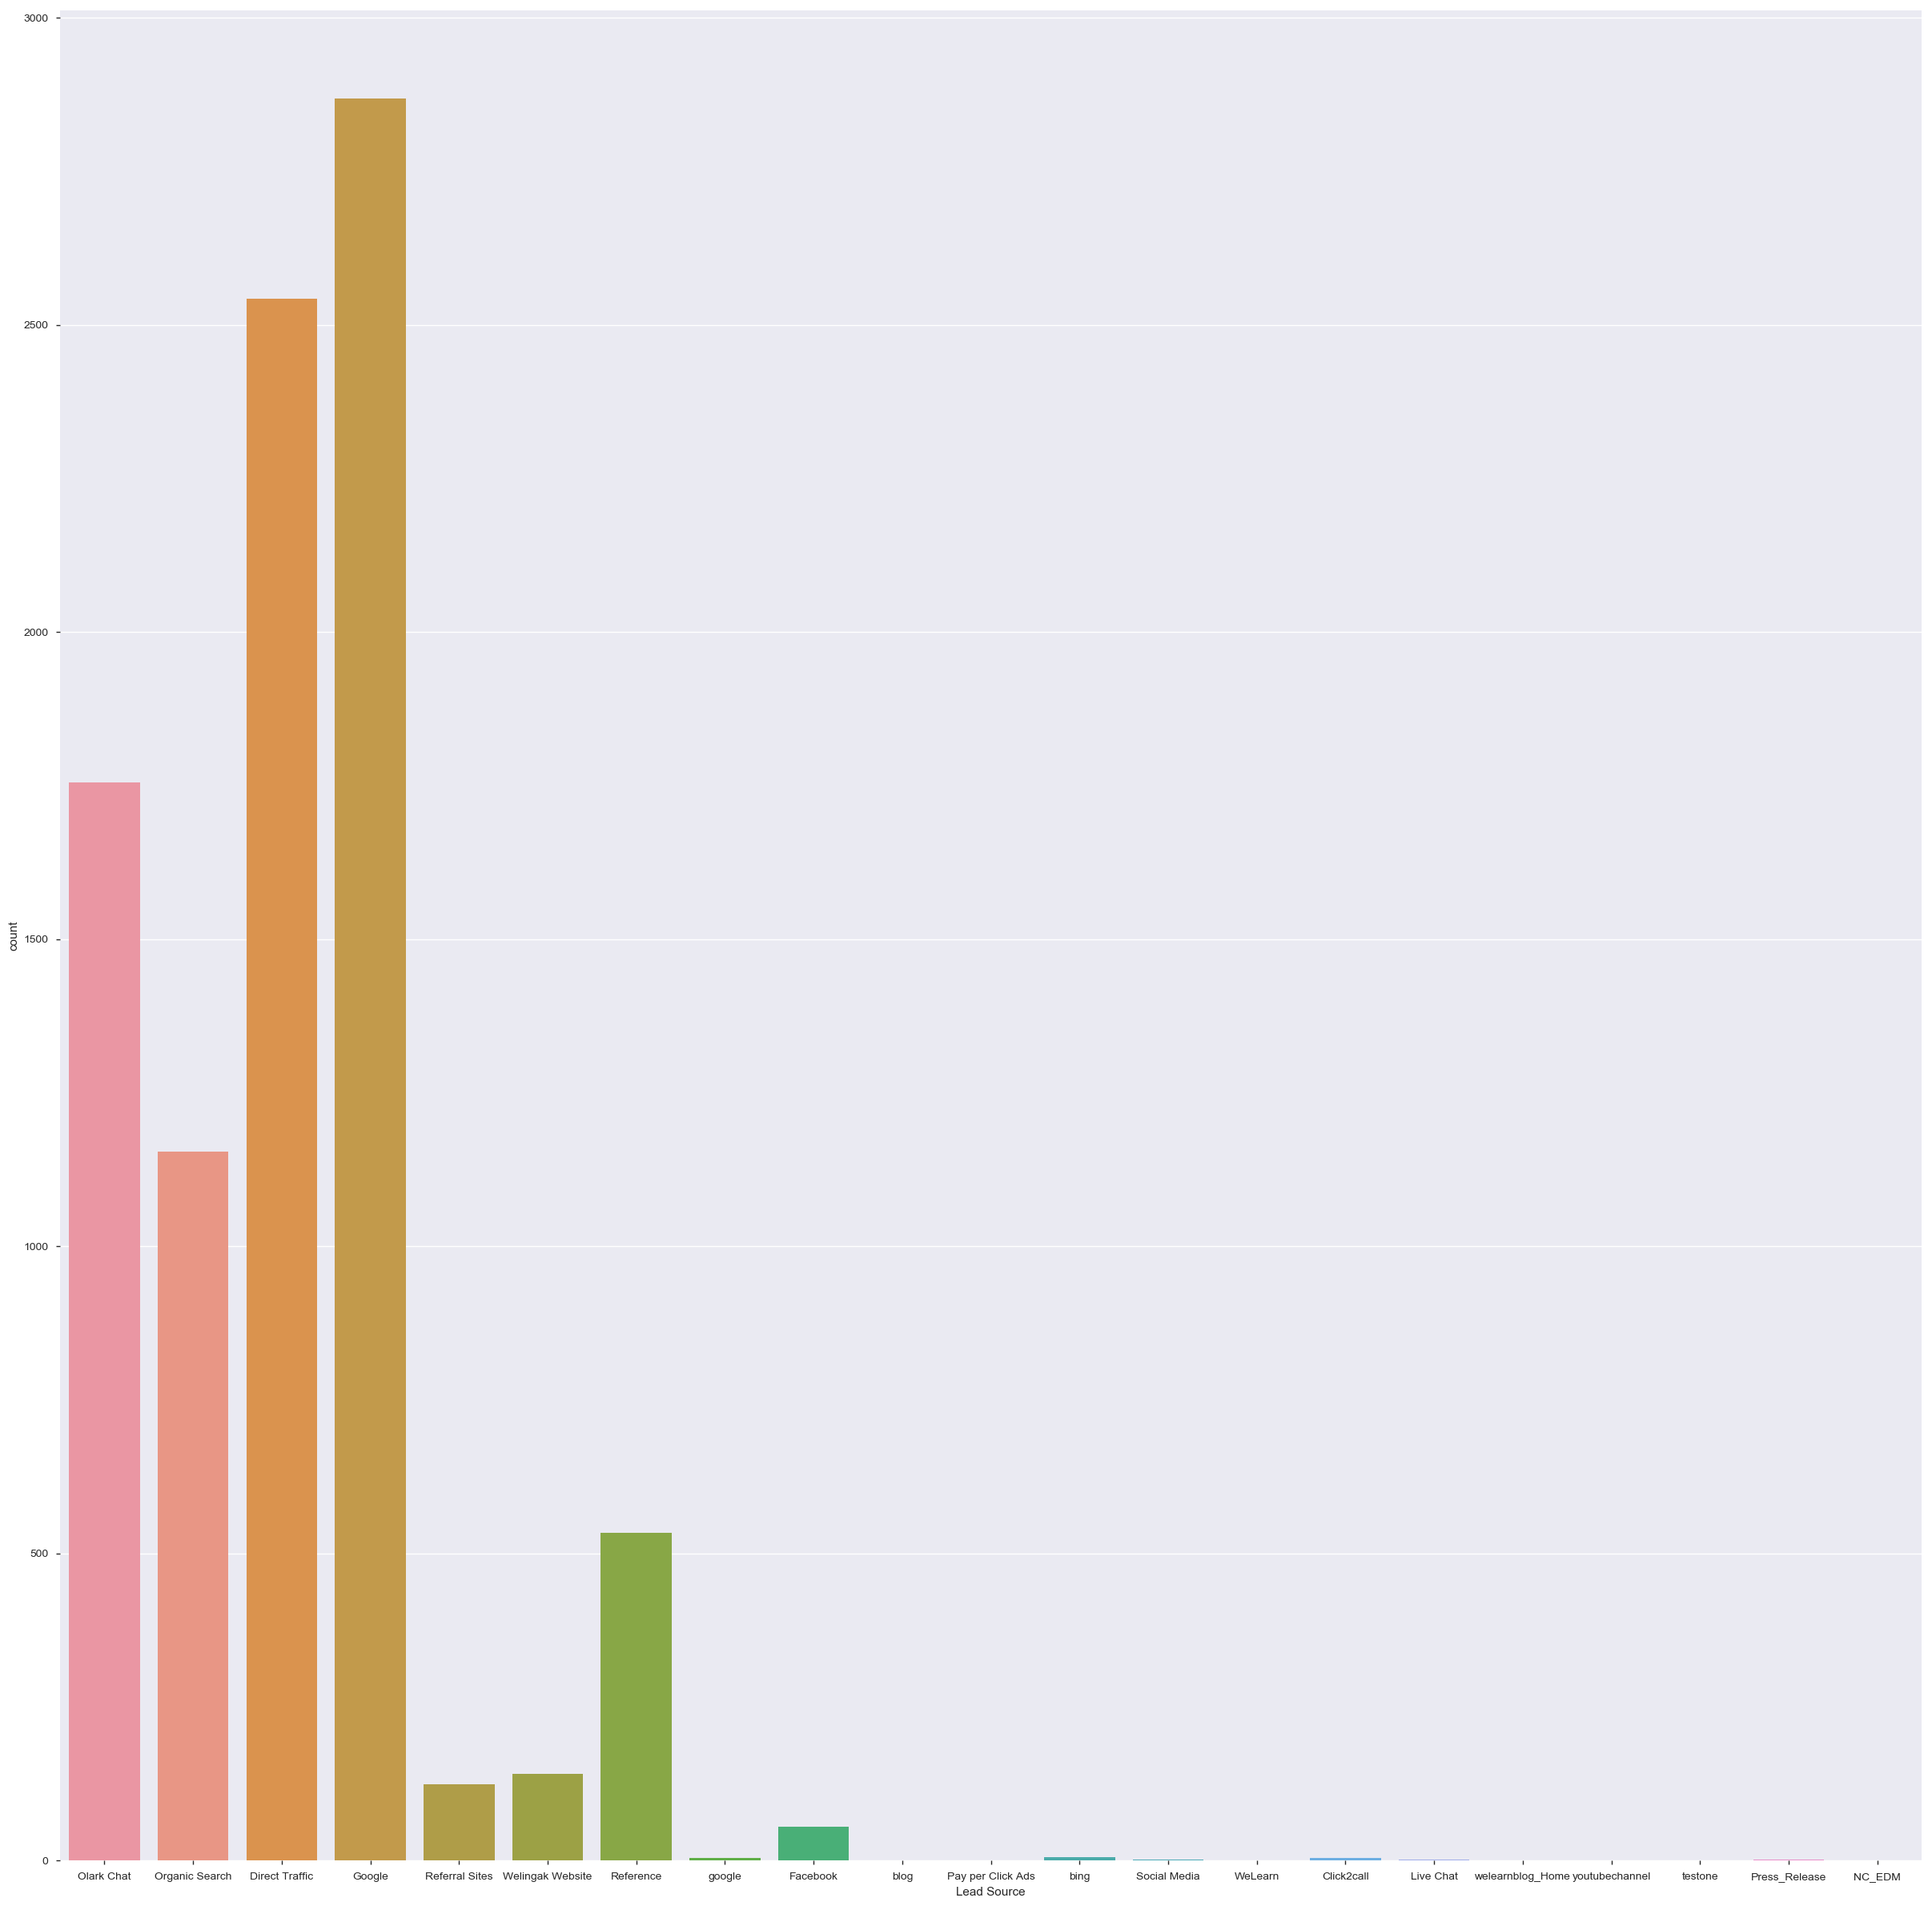

In [57]:
plt.figure(figsize=(30, 30))
sns.countplot(lead_df['Lead Source'])

Missing values can be replaced by 'Google' as it has the highest count.

In [58]:
#Replacing the missing values
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan,'Google')

In [59]:
#To check how many columns are present now:

len(lead_df.columns)

31

In [60]:
#checking % of missing values again:

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)


Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [61]:
lead_df.columns.values

array(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype=object)

In [62]:
lead_df

Prospect ID  Lead Number              Lead Origin       Lead Source Do Not Email Do Not Call  Converted                            TotalVisits  Total Time Spent on Website                   Page Views Per Visit                 Last Activity               Country                     Specialization What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                   Tags       Lead Quality Update me on Supply Chain Content Get updates on DM Content                         City I agree to pay the amount through cheque A free copy of Mastering The Interview     Last Notable Activity
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API        Olark Chat           No          No          0                                      0                            0                                      0       Page Visited on Website                 India                             Others                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No            Interested in other courses   Low in Relevance                                No                        No                       Mumbai                                       No                                     No                  Modified
1     2a272436-5132-4136-86fa-dcc88c88f482       660728                      API    Organic Search           No          No          0                                      5                          674                                    2.5                  Email Opened                 India                             Others                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                                Ringing           Not Sure                                No                        No                       Mumbai                                       No                                     No              Email Opened
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission    Direct Traffic           No          No          1                                      2                         1532                                      2                  Email Opened                 India            Business Administration                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No    Will revert after reading the email           Might be                                No                        No                       Mumbai                                       No                                    Yes              Email Opened
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission    Direct Traffic           No          No          0                                      1                          305                                      1                   Unreachable                 India              Media and Advertising                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                                Ringing           Not Sure                                No                        No                       Mumbai                                       No                                     No                  

# Data Analysis:

In [63]:
# Checking the Converted Rate :

conv_rate= (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
conv_rate

38.53896103896104

Around 38% of the leads are converted.(They bought the course)

Comparing the columns with the Converted column: <br>
(Prospect ID and Lead Number columns have unique values.So not taking these columns into consideration). 

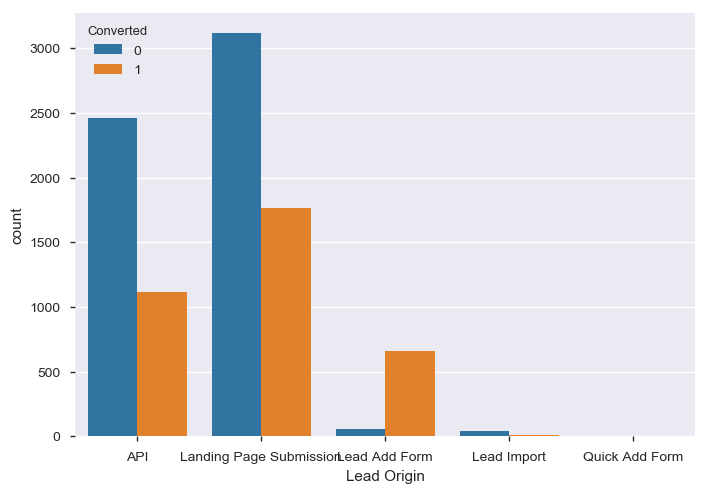

In [64]:
#1.Column- 'Lead Origin'

sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df)

Lead origin indicates the origin identifier with which the customer was identified to be a lead.<br>
The conversion rate of Lead Add form is the highest amongst others but the count is low. Whereas the conversion rate for API and Landing Page Sumbission is low but the count is high. So the conversion rate for API and Landing Page Sumbission have to be improved because of the high count.

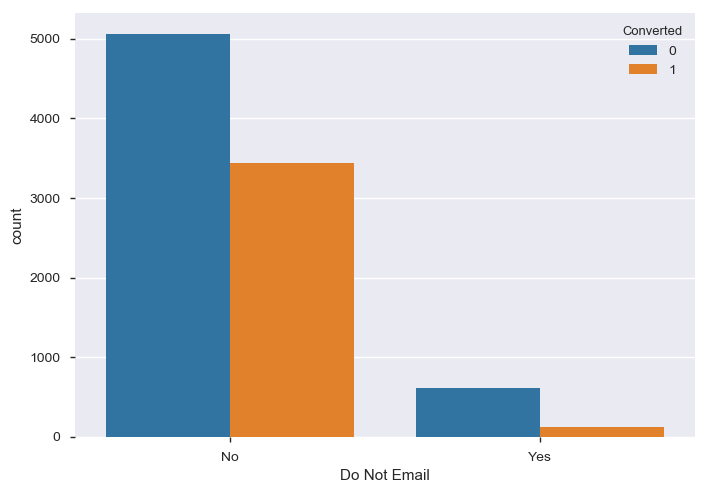

In [65]:
#2.Column- 'Do Not Email'

sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df)

Do not email is an sn indicator variable selected by the customer wherein they select whether or not they want to be emailed about the course or not.<br>
The conversion rate is low in both 'yes' and 'no' cases.

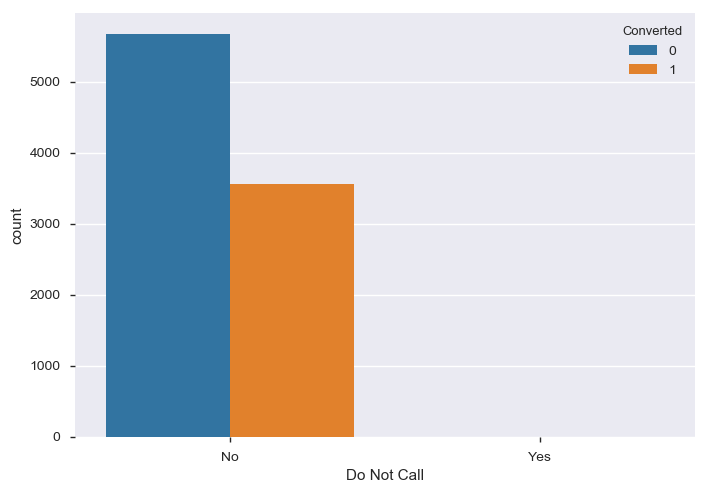

In [66]:
#3.Column- 'Do Not Call'

sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df)

Do not column is an indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
The conversion rate is low.

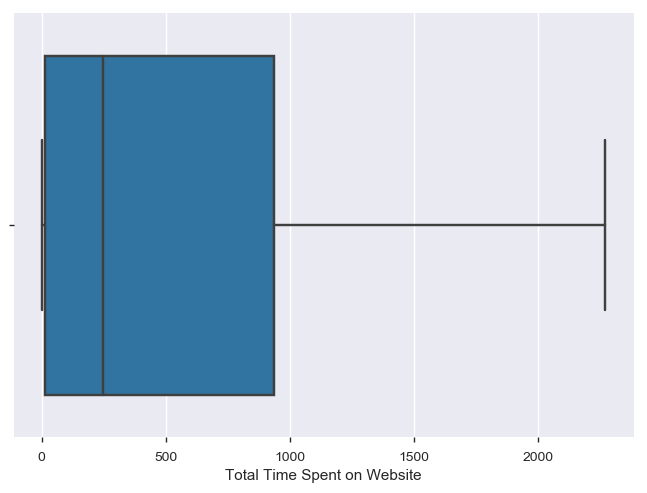

In [67]:
#4.Column- 'Total Time Spent on Website'. Plotting a boxplot because it is a numerical variable.

#Checking outliers first:

sns.boxplot(lead_df['Total Time Spent on Website'])

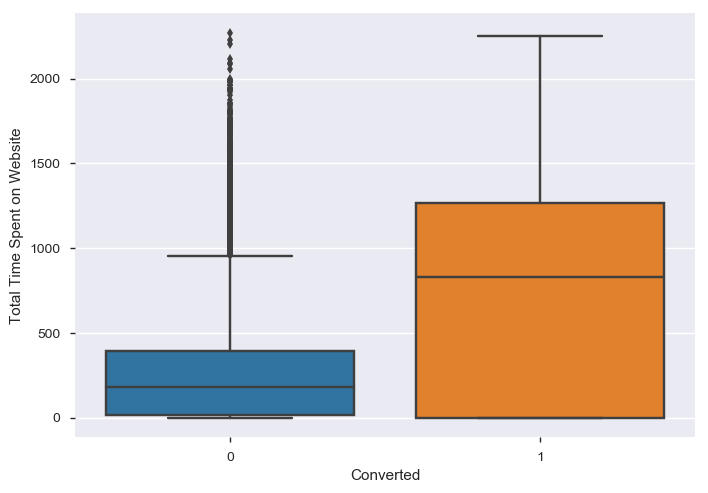

In [68]:
#Plotting the boxplot:

sns.boxplot(y = "Total Time Spent on Website", x = "Converted", data = lead_df)

Total Time Spent on Website is the total time spent by the customer on the website. From the plot shown above it appears that customers spending more time on the website are likely to take up the course.

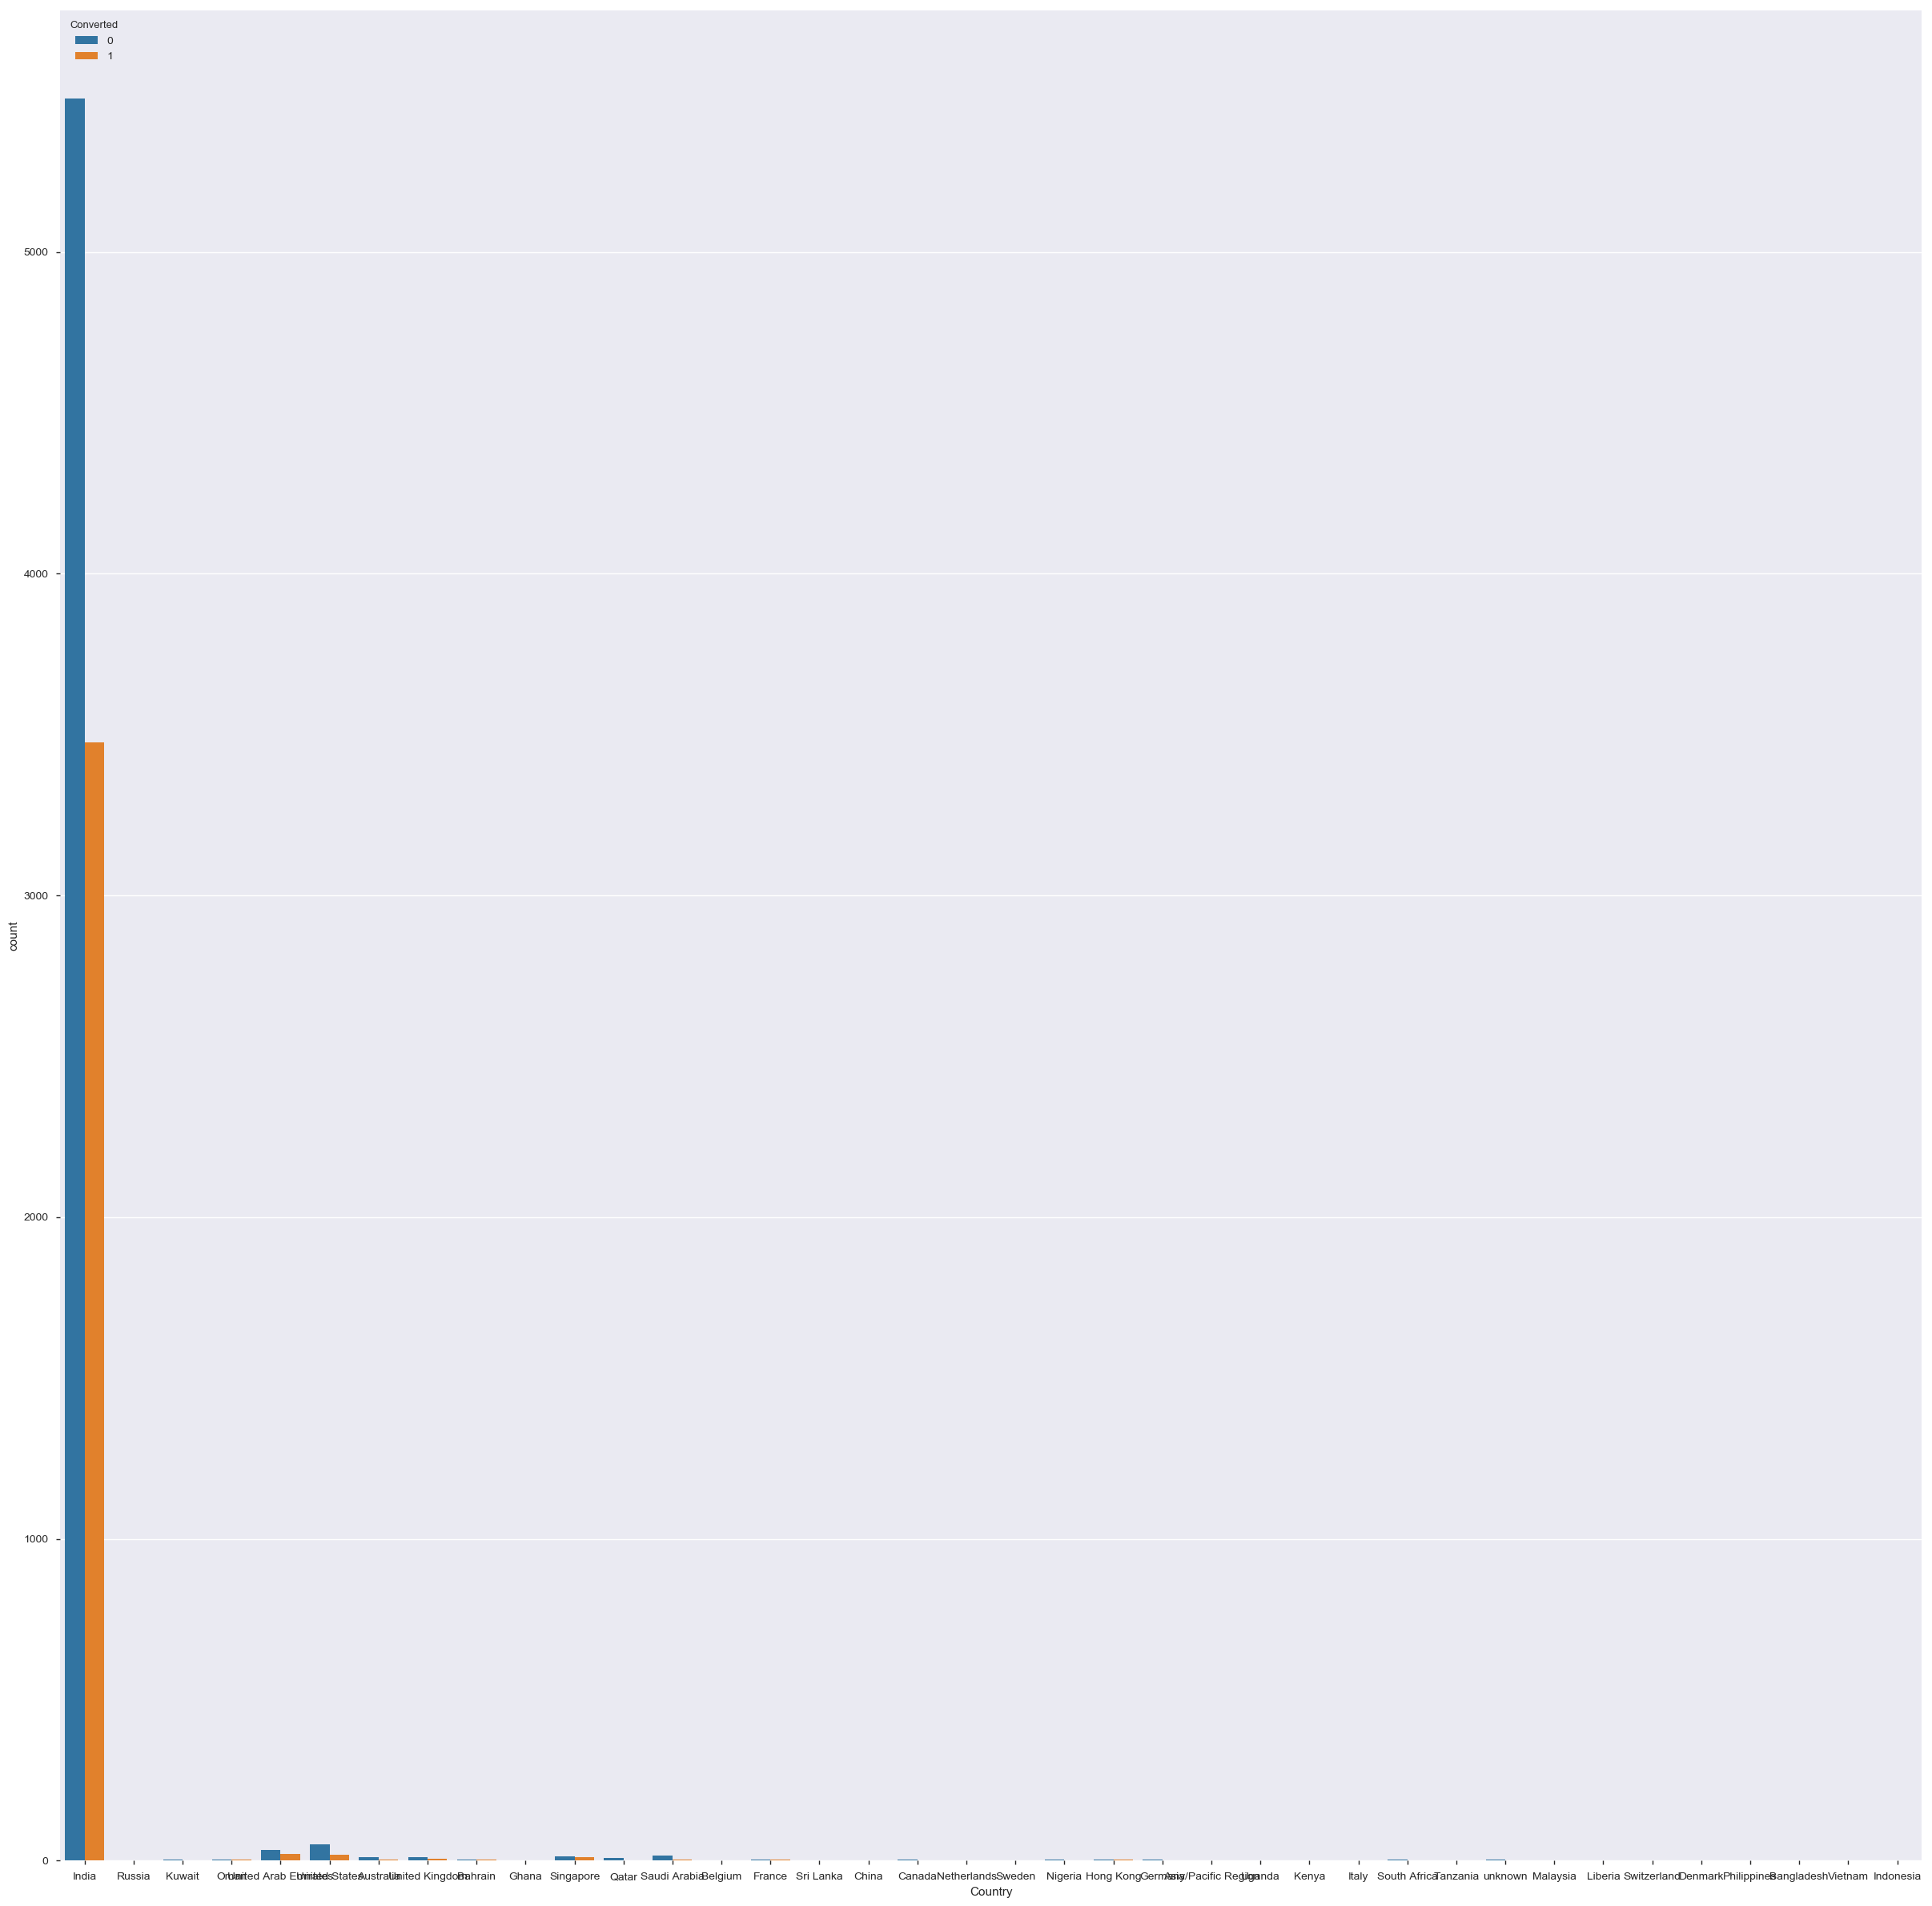

In [69]:
#5.Column- 'Country'

plt.figure(figsize=(30, 30))
sns.countplot(x = "Country", hue = "Converted", data = lead_df)


Most of the customers are from INDIA. 

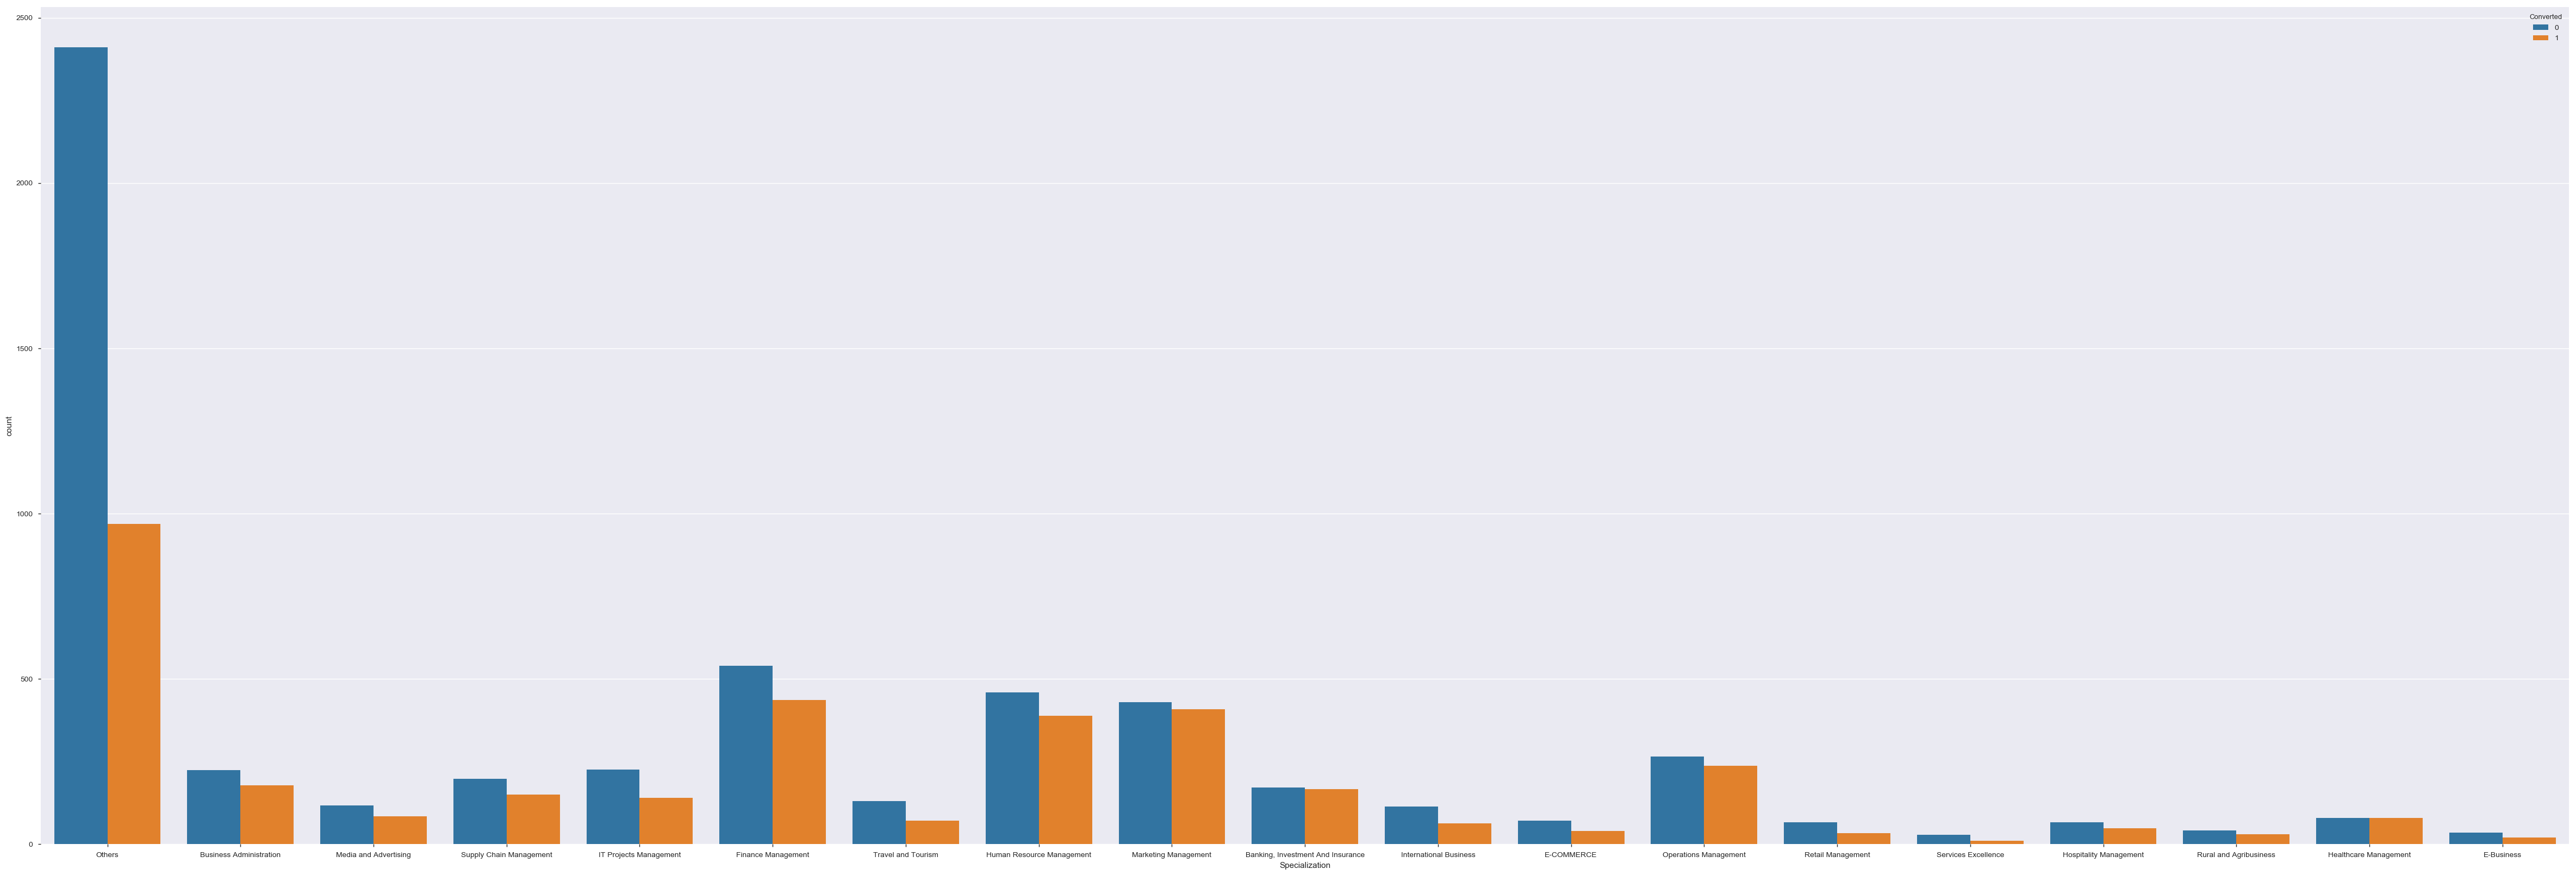

In [70]:
#6.Column- 'Specialization'

plt.figure(figsize=(60,20))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df)

The conversion rates is low for all the specializations but a little better for 'Marketing Management' and 'Banking,Investment And Insurance' so the focus should be on this two. The count for 'Others' is high. So more specializations have to be included.

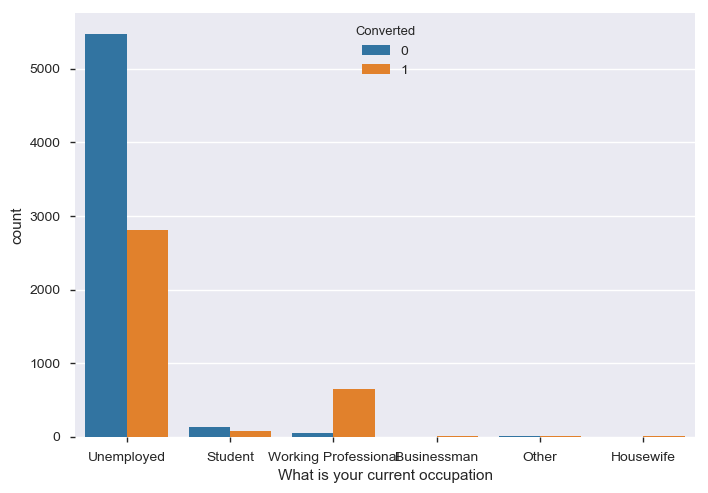

In [71]:
#7. Column- 'What is your current occupation'

sns.countplot(x= 'What is your current occupation', hue='Converted',data=lead_df)

The conversion rate is very high for working professionals but count is less. So this course should be advertised more to working professionals to increase the count.

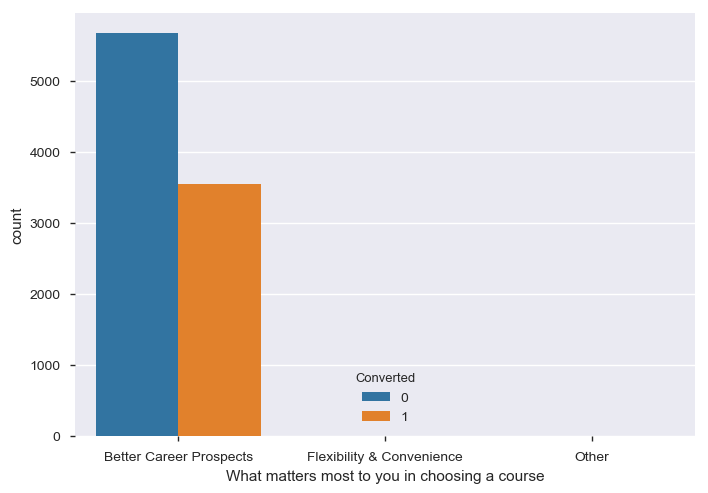

In [72]:
#8. Column-'What matters most to you in choosing a course'

sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=lead_df)

Almost all the people are opting the course for better career prospects.But the conversion rate is low. So more efforts should be put in designing the structure of the course.

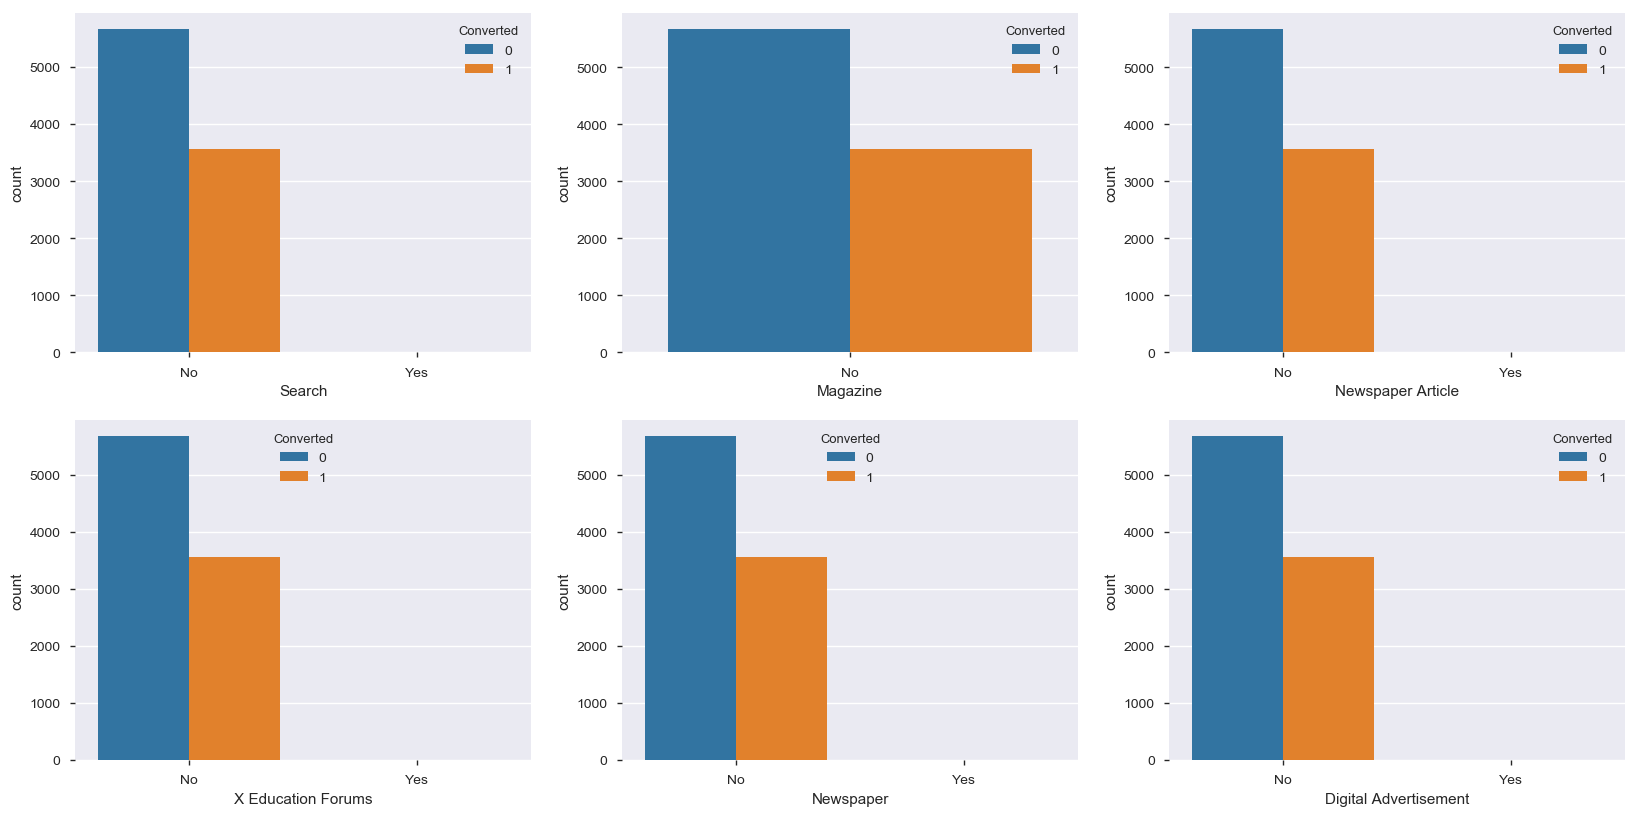

In [73]:
#9 column: 'Search'
#10 column: 'Magazine'
#11 column: 'Newspaper Article'
#12 column: 'X Education Forums'
#13 column: 'Newspaper'
#14 column: 'Digital Advertising'

plt.figure(figsize = (20,15))

plt.subplot(3, 3, 1)
plt1=sns.countplot(x='Search',hue='Converted',data=lead_df)

plt.subplot(3,3,2)
plt2=sns.countplot(x='Magazine',hue='Converted',data=lead_df)

plt.subplot(3,3,3)
plt3=sns.countplot(x='Newspaper Article',hue='Converted',data=lead_df)

plt.subplot(3,3,4)
plt4=sns.countplot(x='X Education Forums',hue='Converted',data=lead_df)

plt.subplot(3,3,5)
plt5=sns.countplot(x='Newspaper',hue='Converted',data=lead_df)

plt.subplot(3,3,6)
plt6=sns.countplot(x='Digital Advertisement',hue='Converted',data=lead_df)

plt.show()

All the above graphs indicating whether the customer had seen the through any of the above columns.(How did the lead get to know about the course).<br>
All the leads found out about the course on their own and not through any of the above columns/items.

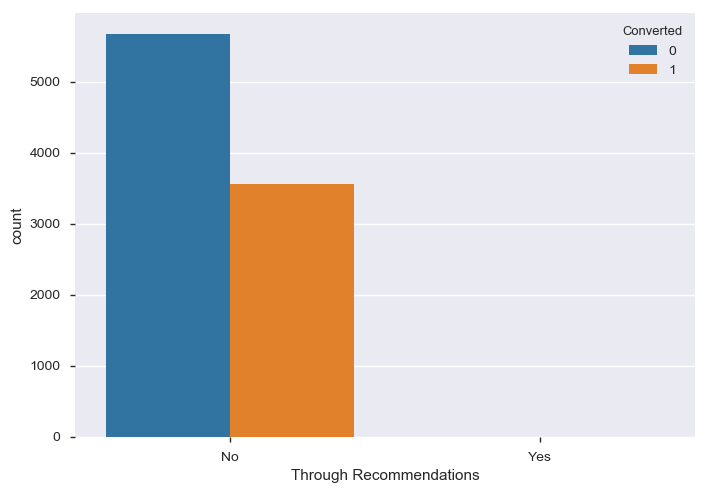

In [74]:
#15 column: 'Through Recommendations'

sns.countplot(x='Through Recommendations', hue='Converted', data=lead_df)

The graph above indicates whether the customer came in through recommendations.<br> All the customers did not come in through recommendations.

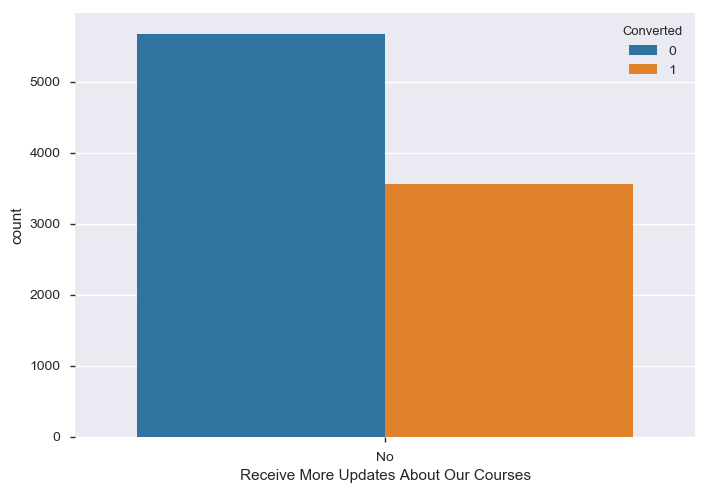

In [75]:
#16 column: 'Receive More Updates About Our Courses'

sns.countplot(x='Receive More Updates About Our Courses',hue='Converted',data=lead_df)

Nothing can be inferred from this as all the leads have opted 'No'. This column can be dropped.

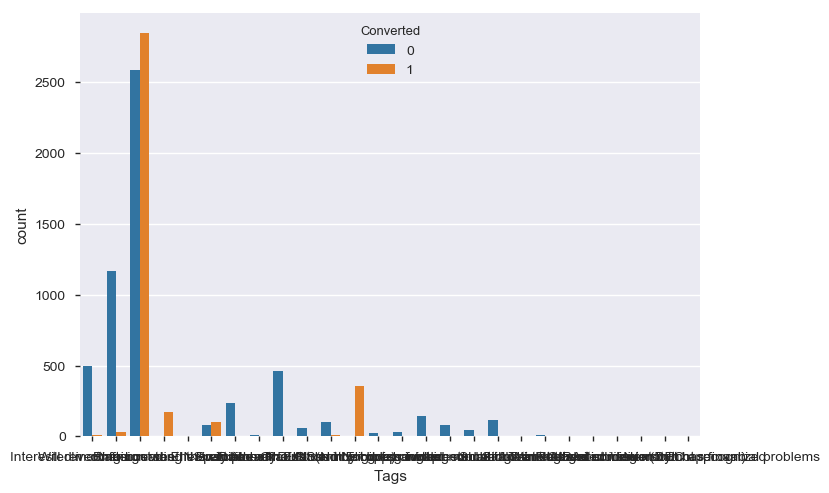

In [76]:


#17 column: 'Tags'


sns.countplot(x='Tags',hue='Converted',data=lead_df)

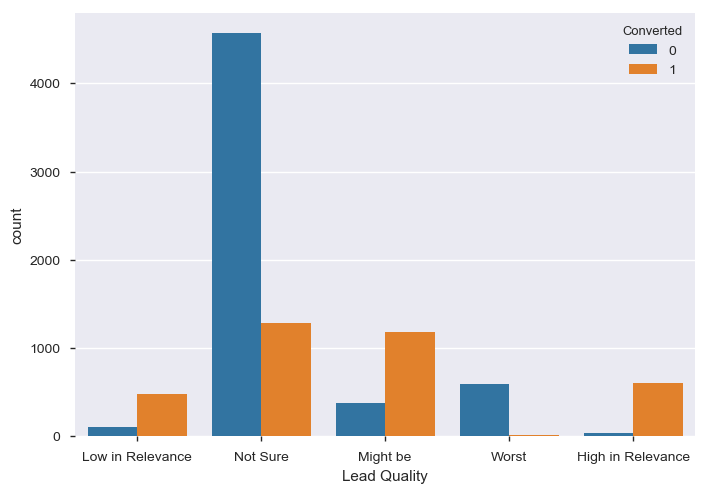

In [77]:
#18 column: 'Lead Quality'

sns.countplot(x='Lead Quality',hue='Converted',data=lead_df)

Conversion rates are high for 'Low in Relevance','Might Be' and 'High in Relevance'.

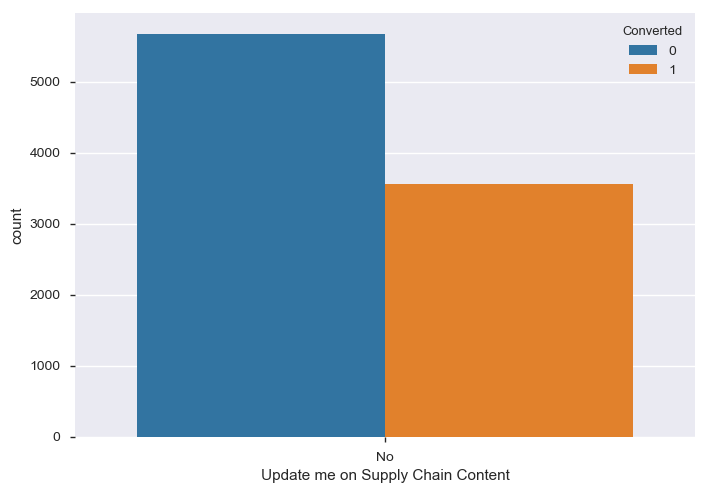

In [78]:
#19 column: 'Update me on Supply Chain Content'

sns.countplot(x='Update me on Supply Chain Content',hue='Converted',data=lead_df)

Nothing can be inferred from this as all the leads have opted 'No'. This column can be dropped.

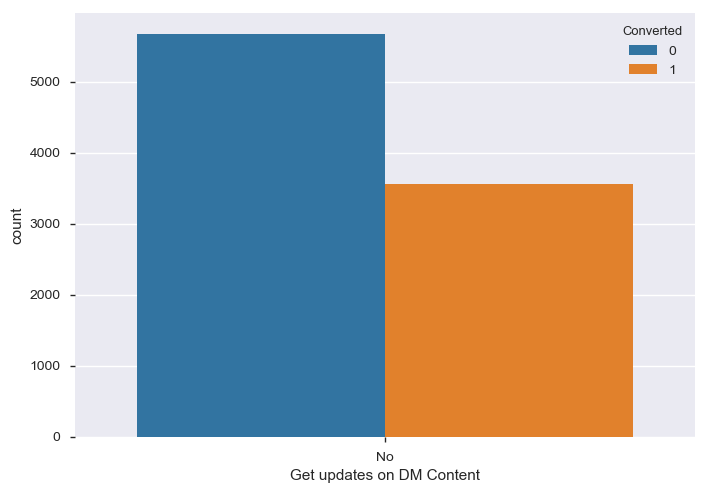

In [79]:
#20 column:'Get updates on DM Content

sns.countplot(x='Get updates on DM Content',hue='Converted',data=lead_df)

Nothing can be inferred from this as all the leads have opted 'No'. This column can be dropped.

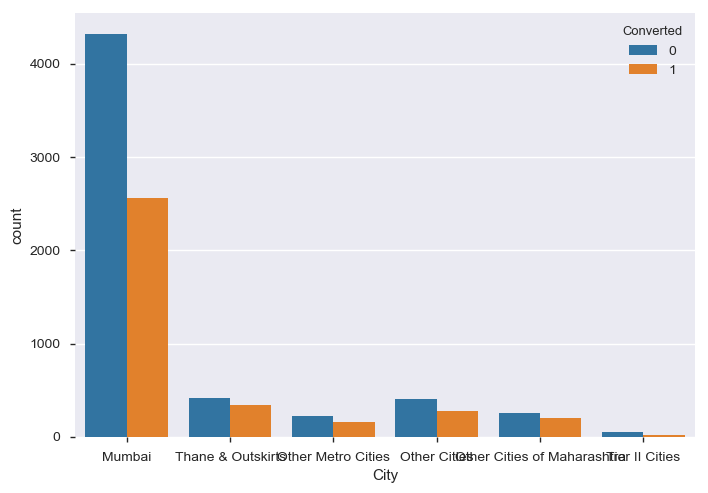

In [80]:
#21 column:'City'

sns.countplot(x='City',hue='Converted',data=lead_df)

The conversion rates is low for all the cities but 'Mumbai' has the highest count. So more focus should be put in this city to improve the conversion rate.

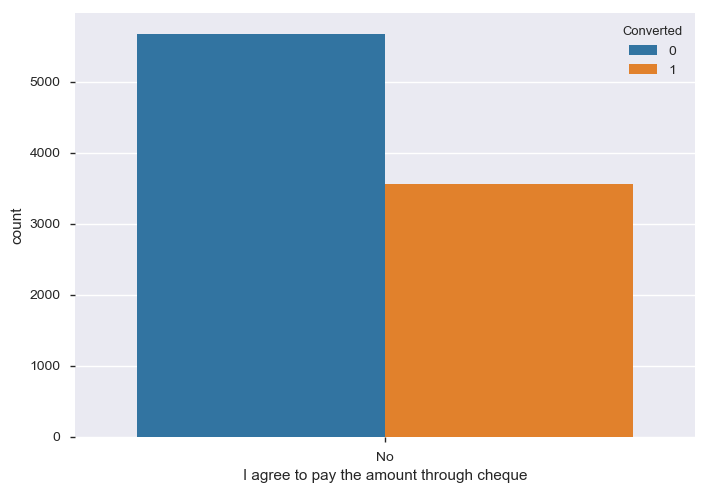

In [81]:
#22 column:'I agree to pay the amount through cheque'

sns.countplot(x='I agree to pay the amount through cheque',hue='Converted',data=lead_df)

Nothing can be inferred from this as all the leads have opted 'No'. This column can be dropped.

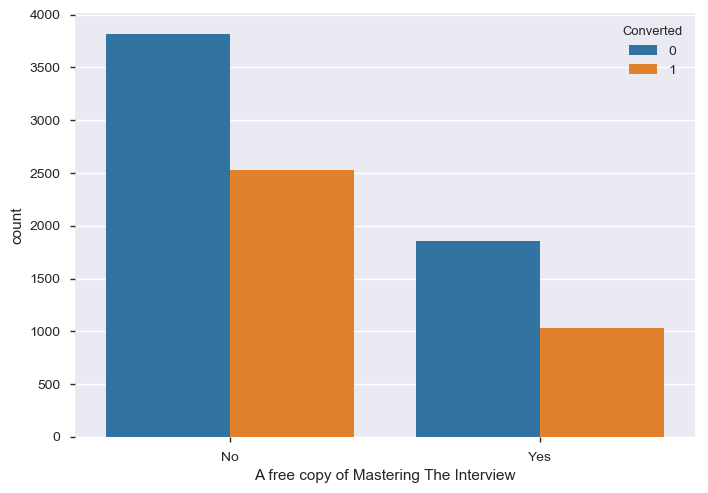

In [82]:
#23 column:'A free copy of Mastering The Interview'

sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=lead_df)

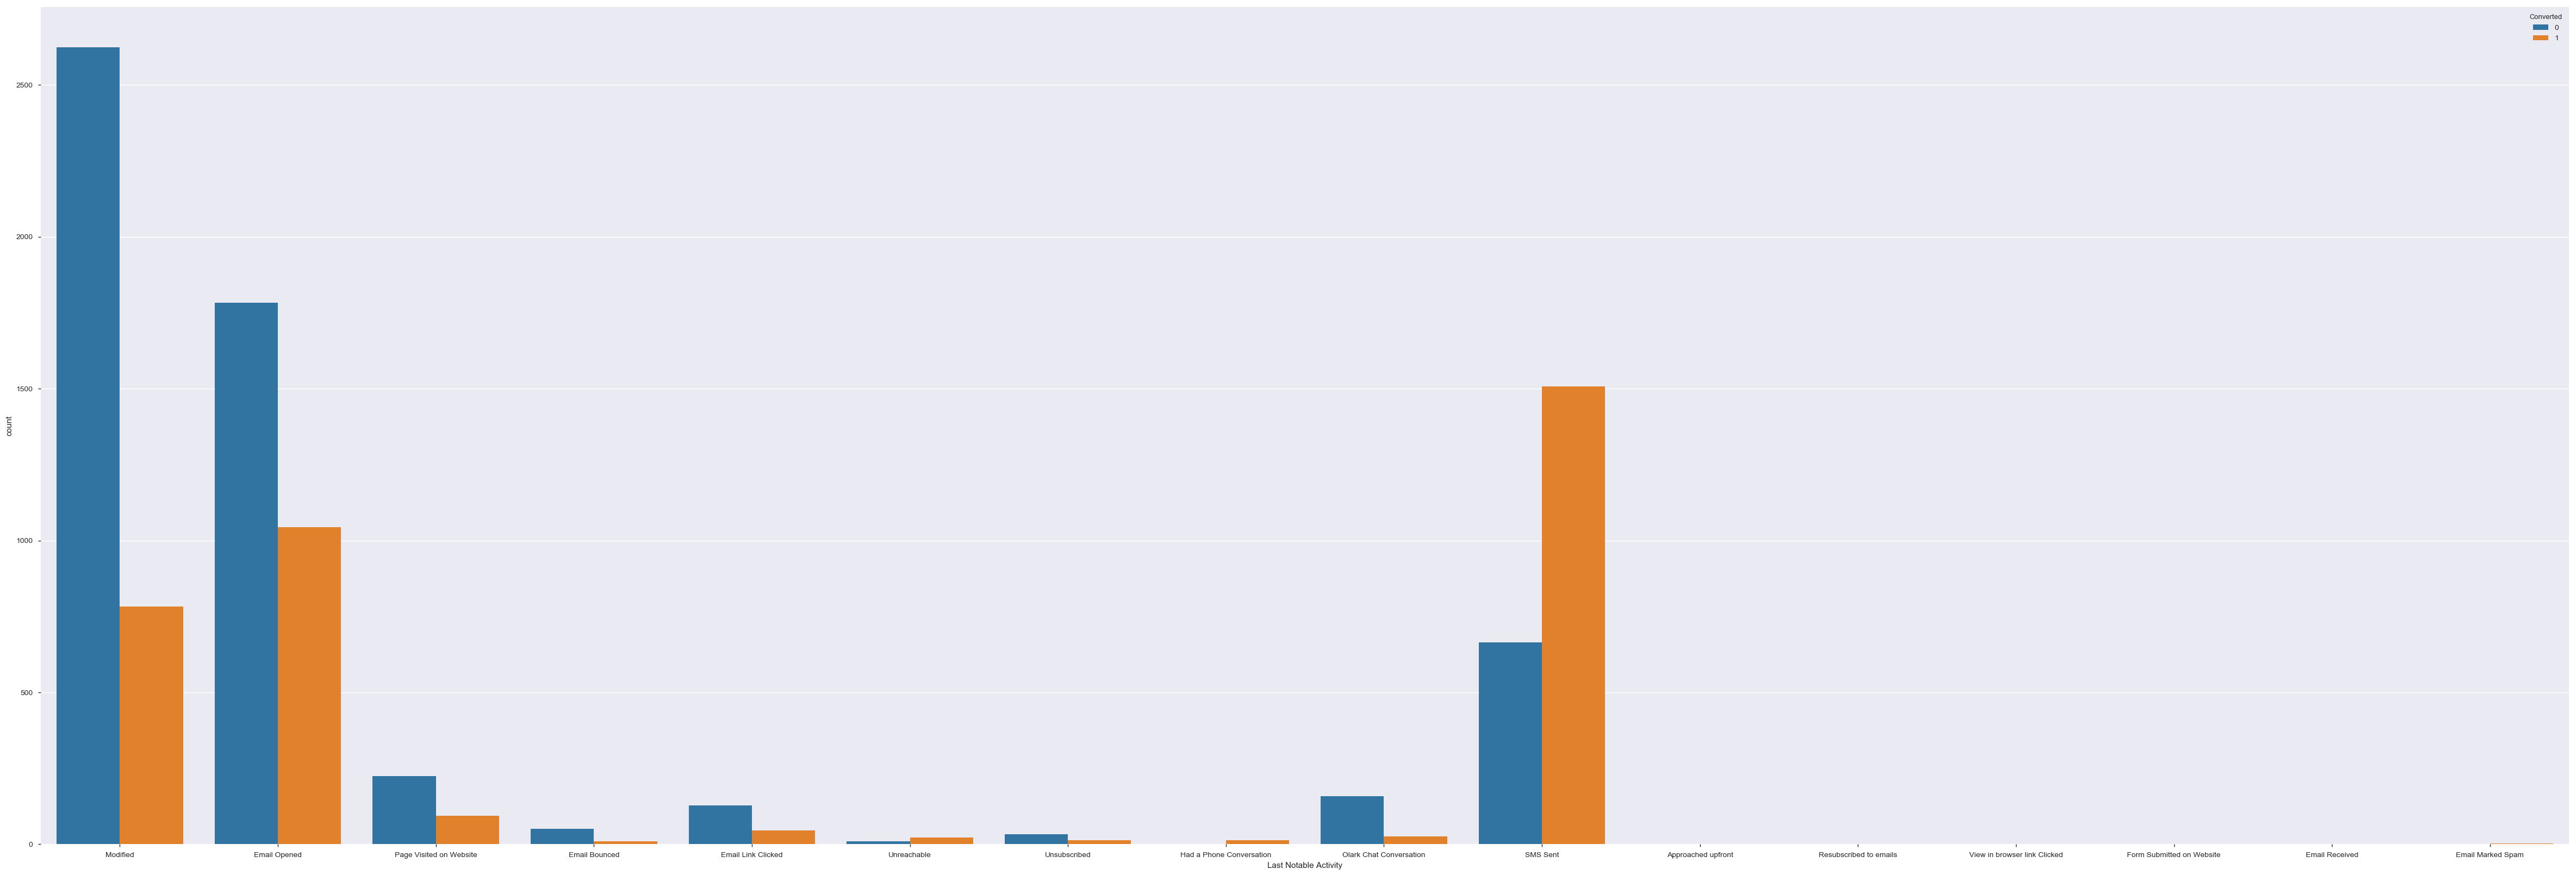

In [83]:
#24 column:'Last Notable Activity'

plt.figure(figsize=(60,20))
sns.countplot(x='Last Notable Activity',hue='Converted',data=lead_df)

The conversion rate is high for 'SMS Sent'.

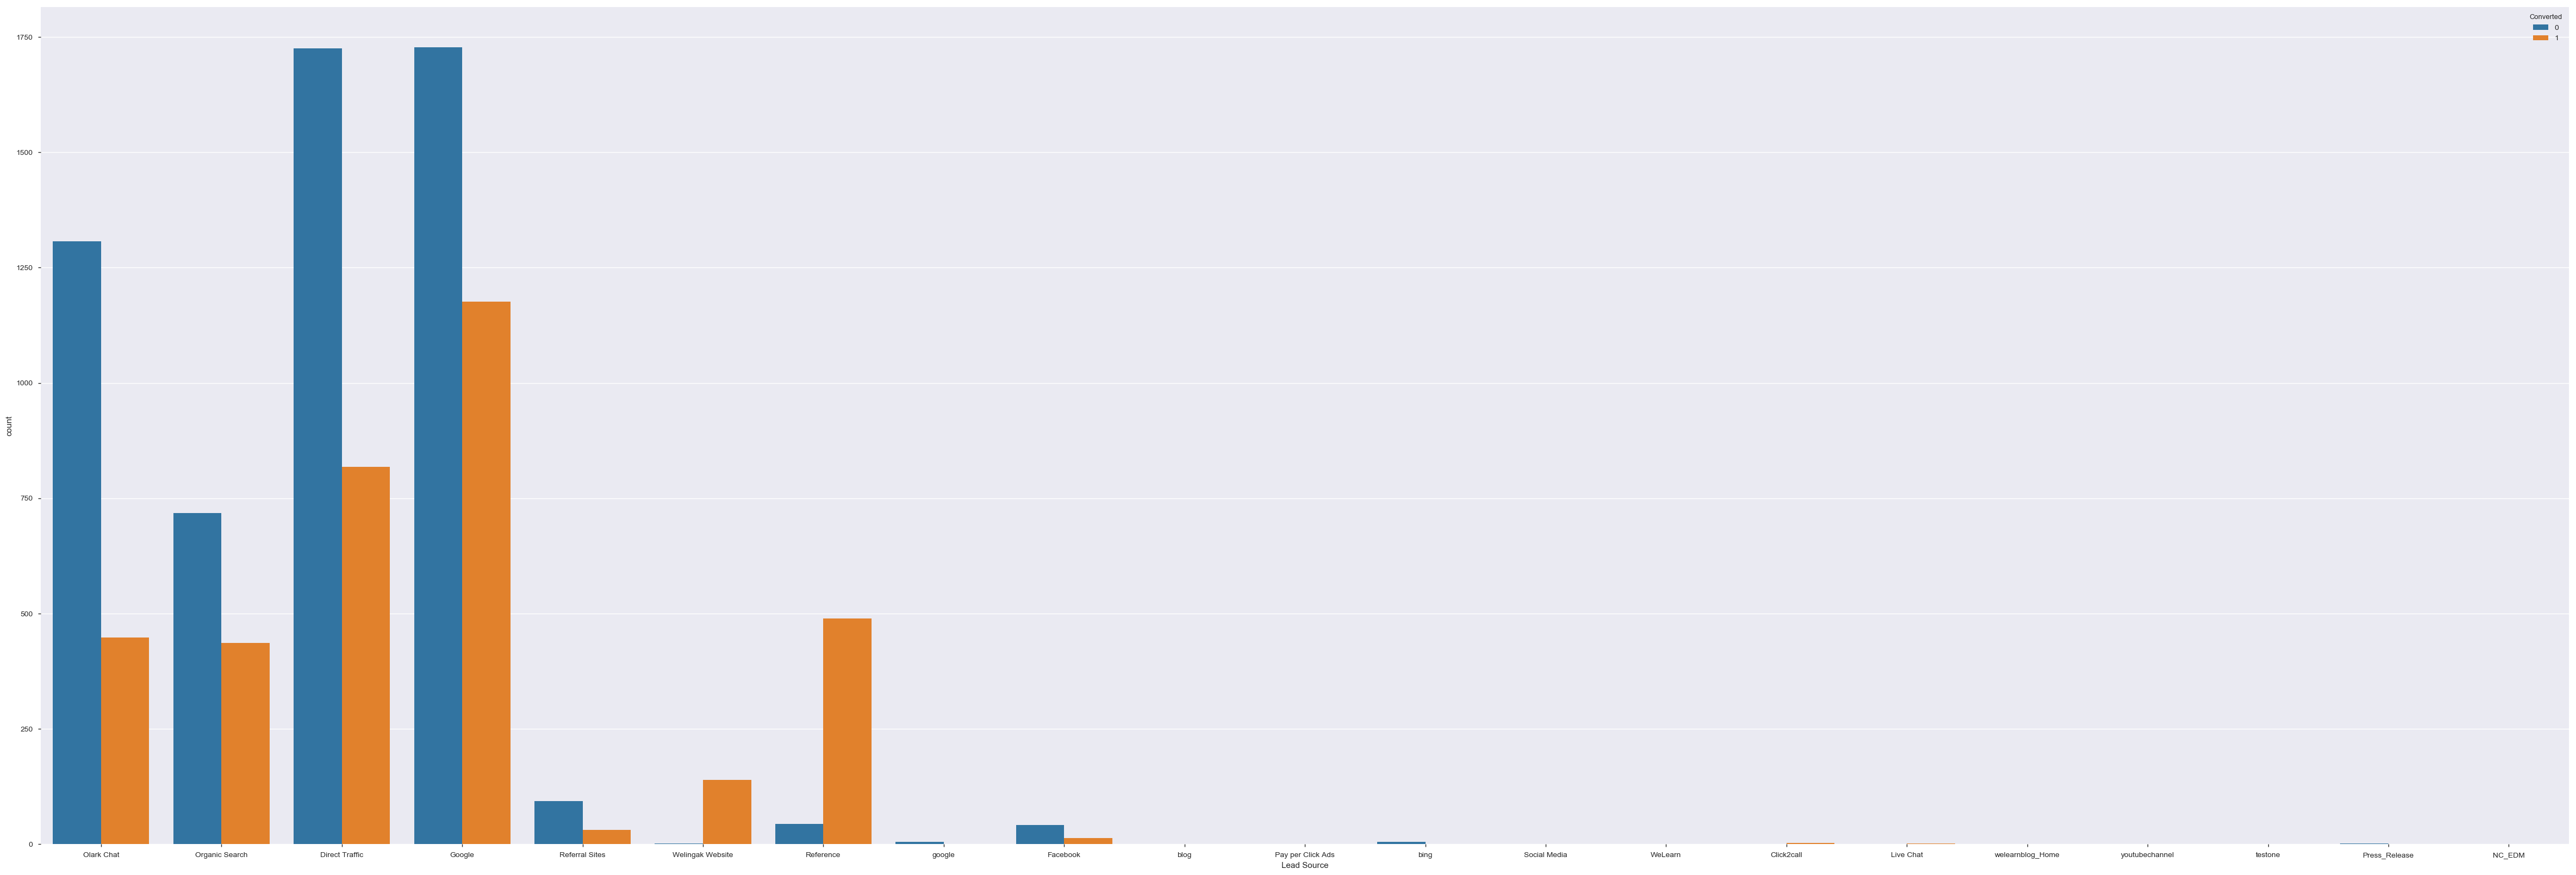

In [84]:
#25 column:'Lead Source'

plt.figure(figsize=(60,20))
sns.countplot(x='Lead Source',hue='Converted',data=lead_df)

'Reference' and 'Welingak Website' have high conversion rates but count is low. So more effort should be put in to improve the count of these two.

### Based on the analysis above some columns are providing very less information so dropping them would be ideal.

In [85]:
lead_df = lead_df.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Page Views Per Visit','TotalVisits','Last Activity','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','Lead Number','A free copy of Mastering The Interview','Country'],1)

In [86]:
lead_df.columns.values

array(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'Total Time Spent on Website',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity'], dtype=object)

### Creating dummy variables for categorical variables:

In [87]:
dummy1 = pd.get_dummies(lead_df[['Lead Origin','Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Lead Source','Last Notable Activity']], drop_first=True)
dummy1.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  Specialization_Operations Management  Specialization_Others  Specialization_Retail Management  Specialization_Rural and Agribusiness  Specialization_Services Excellence  Specialization_Supply Chain Management  Specialization_Travel and Tourism  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Tags_Busy  \
0                                    0                          0                        0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      1                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        0                                           1                                                  0             0   
1                                    0                          0                        0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      1                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        0                                           1                                                  0             0   
2                                    1                          0                        0                           0                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      0                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        1                                           0                                                  0             0   
3  

In [88]:
# Adding the results back to the master dataframe
lead_df = pd.concat([lead_df, dummy1], axis=1)
lead_df.head()

Prospect ID              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  Total Time Spent on Website           Specialization What is your current occupation                                 Tags      Lead Quality    City Last Notable Activity  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  Specialization_Operations Management  Specialization_Others  Specialization_Retail Management  Specialization_Rural and Agribusiness  Specialization_Services Excellence  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API      Olark Chat           No          No          0                            0                   Others                      Unemployed          Interested in other courses  Low in Relevance  Mumbai              Modified                                    0                          0                        0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      1                                 0                                      0                                   0   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API  Organic Search           No          No          0                          674                   Others                      Unemployed                              Ringing          Not Sure  Mumbai          Email Opened                                    0                          0                        0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      1                                 0                                      0                                   0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission  Direct Traffic           No          No          1                         1532  Business Administration                         Student  Will revert after reading the email          Might be  Mumbai          Email Opened                                    1                          0                        0                           0                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      0                                 0                                      0                                   0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission  Direct Traffic           No          No       

In [89]:
# We have created dummies for the above categorical variables, so now we can drop them:

lead_df=lead_df.drop(['Lead Origin','Specialization','What is your current occupation','Tags','Lead Quality','City','Lead Source','Last Notable Activity'], axis = 1)


In [90]:
lead_df.head()

Prospect ID Do Not Email Do Not Call  Converted  Total Time Spent on Website  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  Specialization_Operations Management  Specialization_Others  Specialization_Retail Management  Specialization_Rural and Agribusiness  Specialization_Services Excellence  Specialization_Supply Chain Management  Specialization_Travel and Tourism  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620           No          No          0                            0                                    0                          0                        0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      1                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        0   
1  2a272436-5132-4136-86fa-dcc88c88f482           No          No          0                          674                                    0                          0                        0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      1                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a           No          No          1                         1532                                    1                          0                        0                           0                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      0                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc           No

### Converting some binary variables (Yes/No) to 0/1

In [91]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function:
lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [92]:
lead_df.head()

Prospect ID  Do Not Email  Do Not Call  Converted  Total Time Spent on Website  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  Specialization_Operations Management  Specialization_Others  Specialization_Retail Management  Specialization_Rural and Agribusiness  Specialization_Services Excellence  Specialization_Supply Chain Management  Specialization_Travel and Tourism  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0                            0                                    0                          0                        0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      1                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0                          674                                    0                          0                        0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      1                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1                         1532                                    1                          0                        0                           0                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      0                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc     

# Test-Train Split


In [93]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_df.drop(['Prospect ID','Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  Total Time Spent on Website  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  Specialization_Operations Management  Specialization_Others  Specialization_Retail Management  Specialization_Rural and Agribusiness  Specialization_Services Excellence  Specialization_Supply Chain Management  Specialization_Travel and Tourism  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  \
0             0            0                            0                                    0                          0                        0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      1                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        0                                           1   
1             0            0                          674                                    0                          0                        0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      1                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        0                                           1   
2             0            0                         1532                                    1                          0                        0                           0                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      0                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        1                                           0   
3             0            0           

In [94]:
# Putting response variable to y
y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [95]:
# Splitting the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

Do Not Email  Do Not Call  Total Time Spent on Website  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  Specialization_Operations Management  Specialization_Others  Specialization_Retail Management  Specialization_Rural and Agribusiness  Specialization_Services Excellence  Specialization_Supply Chain Management  Specialization_Travel and Tourism  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  \
1871             0            0                    -0.885371                                    0                          0                        0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    1                                     0                                     0                      0                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        0                                           1   
6795             0            0                     0.005716                                    1                          0                        0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      1                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        0                                           1   
3516             0            0                    -0.691418                                    0                          0                        0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                      1                                 0                                      0                                   0                                       0                                  0                                          0                                      0                                        0                                           1   
8105             0            

# Looking at correlations


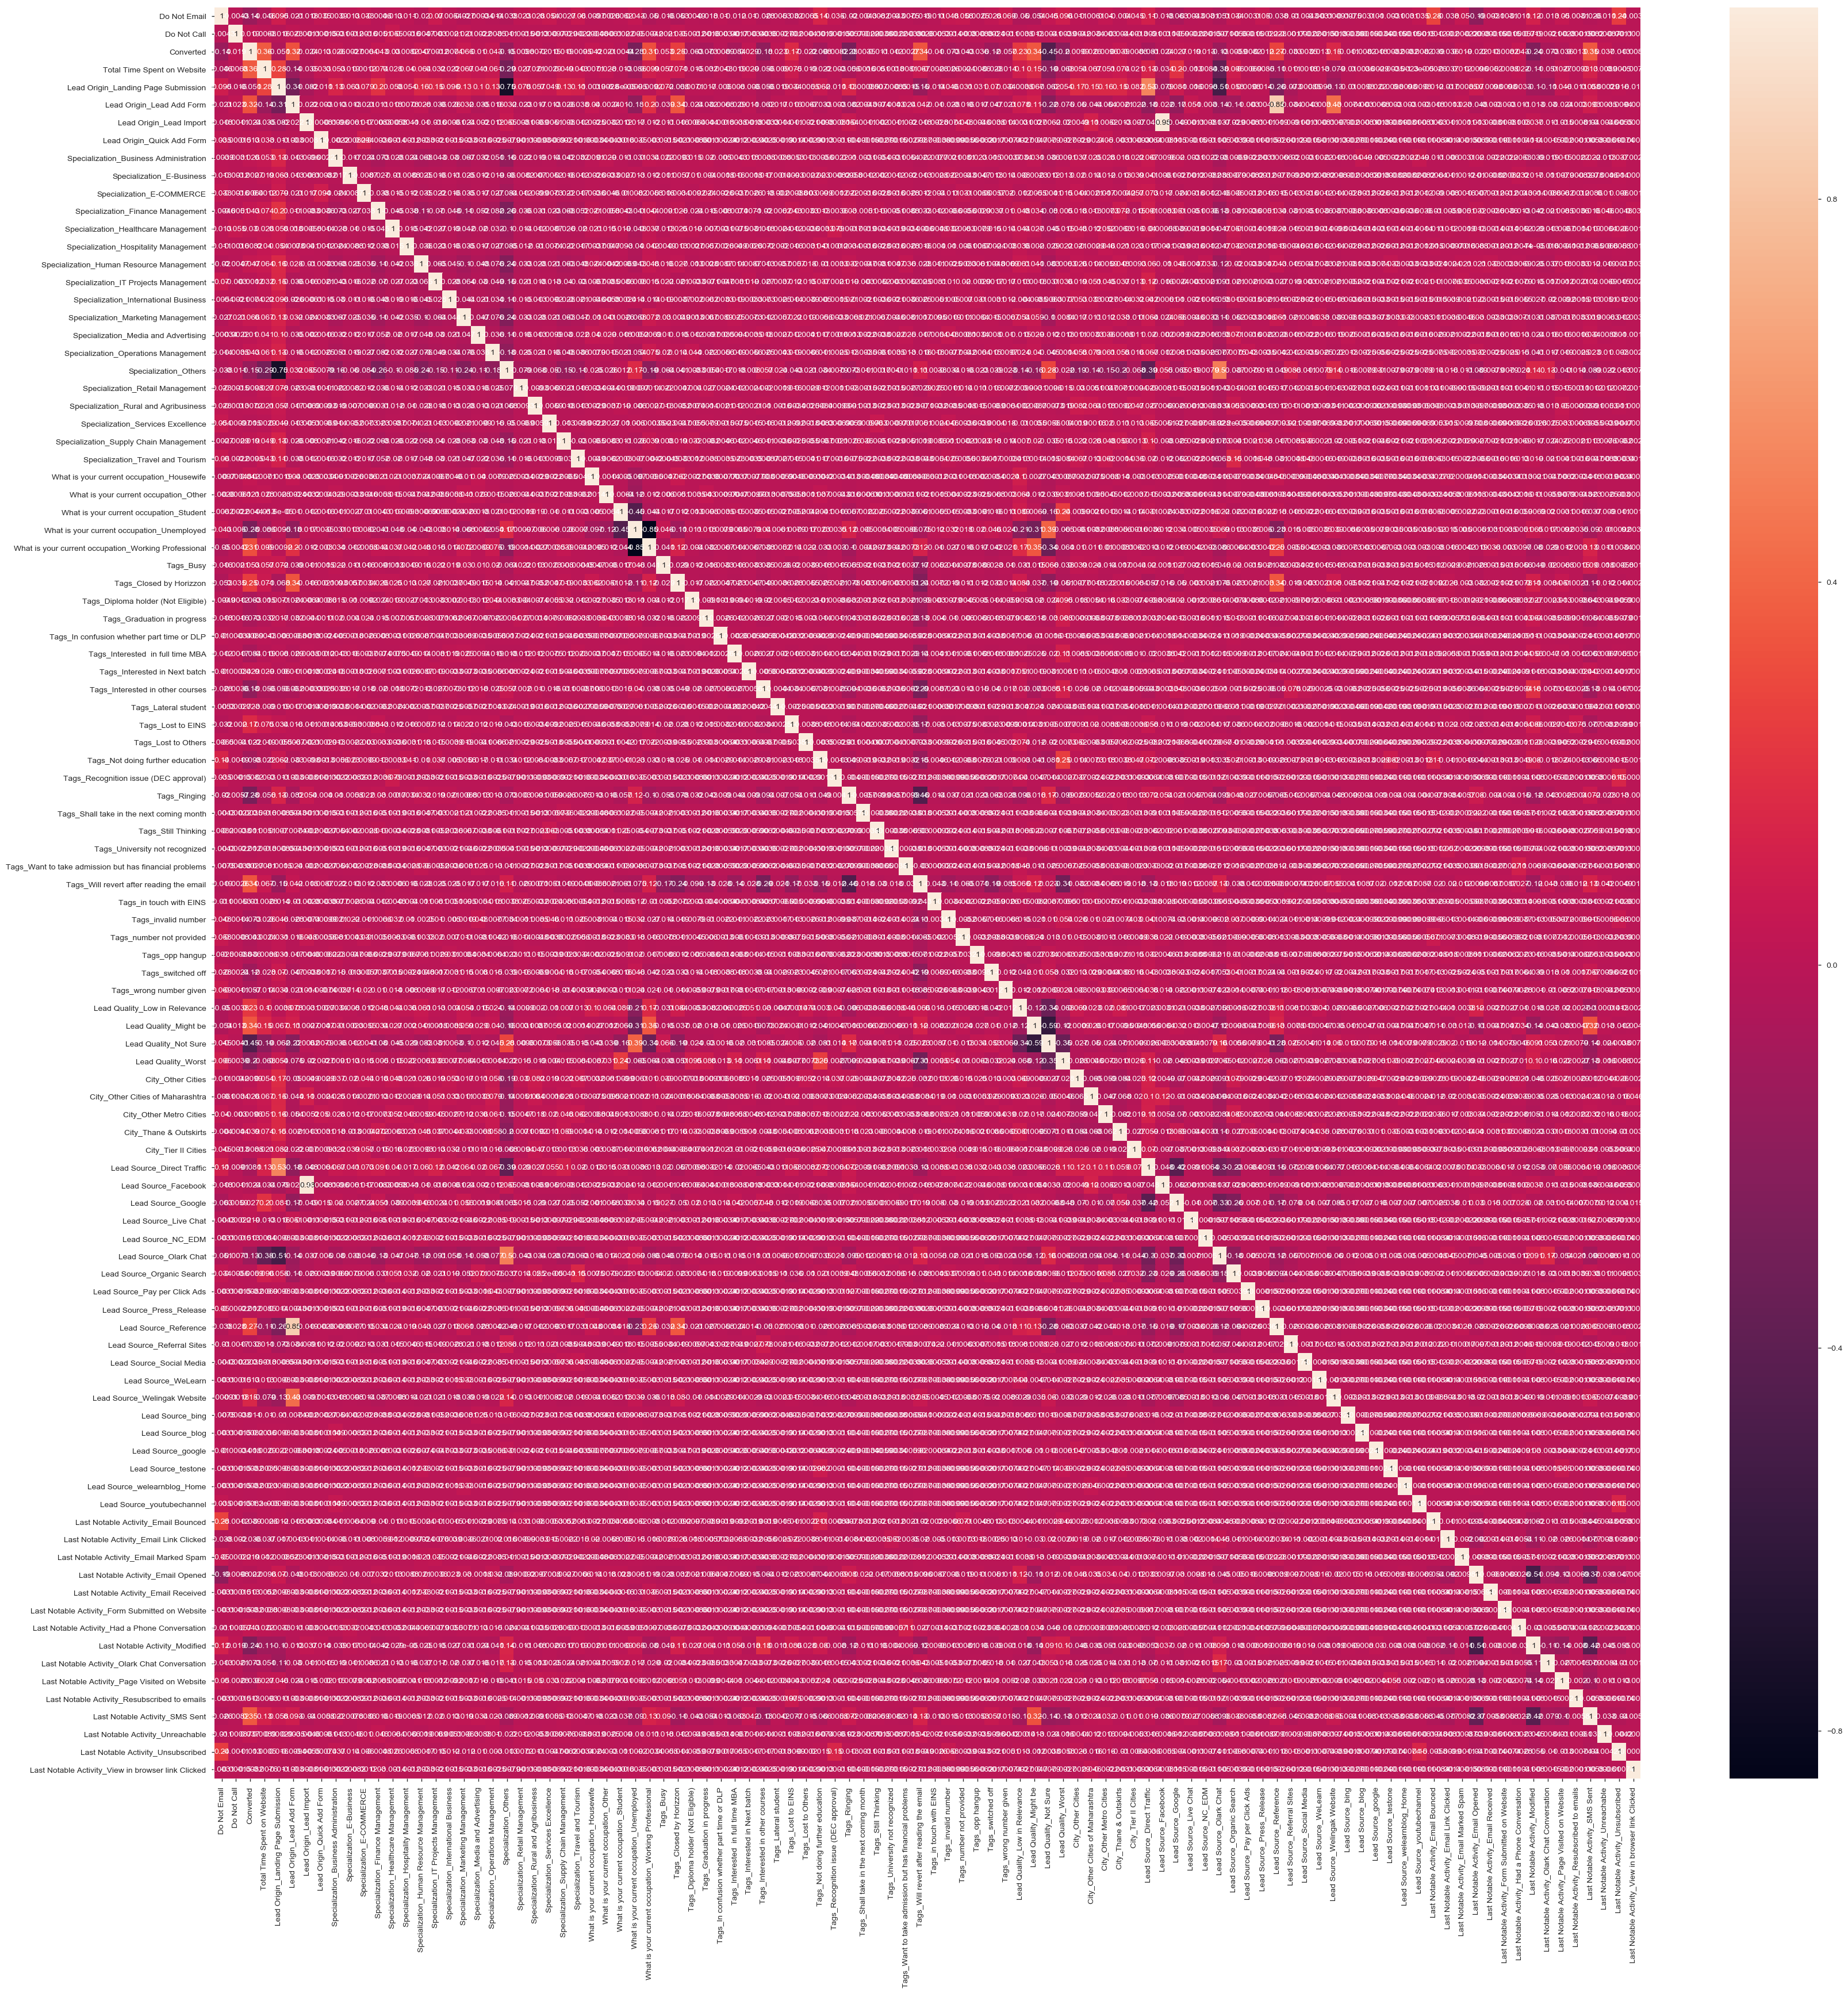

In [97]:
# Plotting the the correlation matrix 
plt.figure(figsize = (40,40))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

# Model Building


In [98]:
import statsmodels.api as sm

In [99]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6371
Model Family:                Binomial   Df Model:                           96
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 30 Aug 2019   Deviance:                          nan
Time:                        19:59:25   Pearson chi2:                 3.48e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -8.278e+14   4.87e+07   -1.7e+07      0.000   -8.28e+14   -8.28e+14
Do Not Email                                           -1.334e+14   3.55e+06  -3.76e+07      0.000   -1.33e+14   -1.33e+14
Do Not Call                                             4.535e+15   4.77e+07    9.5e+07      0.000    4.53e+15    4.53e+15
Total Time Spent on Website                             5.136e+12   9.93e+05   5.17e+06      0.000    5.14e+12    5.14e+12
Lead Origin_Landing Page Submission                     1.179e+14    3.4e+06   3.47e+07      0.000    1.18e+14    1.18e+14
Lead Origin_Lead Add Form                               1.059e+13    1.3e+07   8.16e+05      0.000    1.06e+13    1.06e+13
Lead Origin_Lead Import                                 3.905e+15   4.88e+07   8.01e+07      0.000    3.91e+15    3.91e+15
Lead Origin_Quick Add Form                              5.532e+15   6.79e+07   8.15e+07      0.000    5.53e+15    5.53e+15
Specialization_Business Administration                 -7.724e+13   6.05e+06  -1.28e+07      0.000   -7.72e+13   -7.72e+13
Specialization_E-Business                              -2.019e+14    1.2e+07  -1.68e+07      0.000   -2.02e+14   -2.02e+14
Specialization_E-COMMERCE                              -1.681e+14    8.7e+06  -1.93e+07      0.000   -1.68e+14   -1.68e+14
Specialization_Finance Management                      -5.493e+13    5.2e+06  -1.06e+07      0.000   -5.49e+13   -5.49e+13
Specialization_Healthcare Management                   -4.653e+13   8.17e+06  -5.69e+06      0.000   -4.65e+13   -4.65e+13
Specialization_Hospitality Management                   -2.58e+14   8.54e+06  -3.02e+07      0.000   -2.58e+14   -2.58e+14
Specialization_Human Resource Management                -1.02e+14   5.29e+06  -1.93e+07      0.000   -1.02e+14   -1.02e+14
Specialization_IT Projects Management                   1.602e+13   6.29e+06   2.55e+06      0.000     1.6e+13     1.6e+13
Specialization_International Business                  -1.195e+14   7.61e+06  -1.57e+07      0.000   -1.19e+14   -1.19e+14
Specialization_Marketing Management                    -7.153e+13   5.28e+06  -1.36e+07      0.000   -7.15e+13   -7.15e+13
Specialization_Media and Advertising                   -5.339e+13   7.42e+06   -7.2e+06      0.000   -5.34e+13   -5.34e+13
Specialization_Operations Management                    4.397e+13   5.74e+06   7.66e+06      0.000     4.4e+13     4.4e+13
Specialization_Others                                  -5.962e+13    5.4e+06   -1.1e+07      0.000   -5.96e+13   -5.96e+13
Specialization_Retail Management                       -2.908e+14   9.23e+06  -3.15e+07      0.000   -2.91e+14   -2.91e+14
Specialization_Rural and Agribusiness                   9.334e+13   1.09e+07   8.58e+06

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Using RFE to select optimum variables:

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [101]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [102]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 5),
 ('Do Not Call', False, 35),
 ('Total Time Spent on Website', False, 10),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Origin_Quick Add Form', False, 47),
 ('Specialization_Business Administration', False, 53),
 ('Specialization_E-Business', False, 42),
 ('Specialization_E-COMMERCE', False, 20),
 ('Specialization_Finance Management', False, 74),
 ('Specialization_Healthcare Management', False, 58),
 ('Specialization_Hospitality Management', False, 25),
 ('Specialization_Human Resource Management', False, 71),
 ('Specialization_IT Projects Management', False, 30),
 ('Specialization_International Business', False, 23),
 ('Specialization_Marketing Management', False, 70),
 ('Specialization_Media and Advertising', False, 56),
 ('Specialization_Operations Management', False, 78),
 ('Specialization_Others', False, 41),
 ('Specialization_Retail Management', False, 44

In [103]:
col = X_train.columns[rfe.support_]

In [104]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Others', 'Specialization_Retail Management', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism', 'What is your current occupation_Housewife', 'What is your current occupation_Other',
       'What is your current occupatio

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1640.4
Date:                Fri, 30 Aug 2019   Deviance:                       3280.8
Time:                        19:59:28   Pearson chi2:                 3.22e+04
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9027      0.215     -8.835      0.000      -2.325      -1.481
What is your current occupation_Working Professional     1.2531      0.276      4.544      0.000       0.713       1.794
Tags_Busy                                                3.7862      0.330     11.466      0.000       3.139       4.433
Tags_Closed by Horizzon                                  8.9965      1.037      8.679      0.000       6.965      11.028
Tags_Lateral student                                    24.9397   4.25e+04      0.001      1.000   -8.32e+04    8.33e+04
Tags_Lost to EINS                                        9.1099      0.750     12.139      0.000       7.639      10.581
Tags_Ringing                                            -1.7759      0.325     -5.459      0.000      -2.414      -1.138
Tags_Will revert after reading the email                 3.8435      0.231     16.668      0.000       3.392       4.296
Tags_in touch with EINS                                  2.6881      0.904      2.975      0.003       0.917       4.459
Tags_invalid number                                     -2.2225      1.120     -1.985      0.047      -4.417      -0.028
Tags_number not provided                               -22.3208   1.32e+04     -0.002      0.999   -2.59e+04    2.59e+04
Tags_switched off                                       -2.5738      0.586     -4.393      0.000      -3.722      -1.425
Lead Quality_Not Sure                                   -3.5117      0.127    -27.695      0.000      -3.760      -3.263
Lead Quality_Worst                                      -3.4447      0.684     -5.037      0.000      -4.785      -2.104
Lead Source_Welingak Website                             4.2731      0.730      5.850      0.000       2.841       5.705
Last Notable Activity_SMS Sent                           2.7642      0.120     23.114      0.000       2.530       2.999
========================================================================================================================
"""

In [106]:
col1 = col.drop('Tags_Lateral student',1)

In [107]:
col1

Index(['What is your current occupation_Working Professional', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Lead Source_Welingak Website', 'Last Notable Activity_SMS Sent'], dtype='object')

In [108]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1644.8
Date:                Fri, 30 Aug 2019   Deviance:                       3289.5
Time:                        19:59:29   Pearson chi2:                 3.23e+04
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8129      0.208     -8.718      0.000      -2.221      -1.405
What is your current occupation_Working Professional     1.2308      0.274      4.490      0.000       0.694       1.768
Tags_Busy                                                3.7032      0.326     11.375      0.000       3.065       4.341
Tags_Closed by Horizzon                                  8.9152      1.035      8.613      0.000       6.886      10.944
Tags_Lost to EINS                                        9.0331      0.749     12.067      0.000       7.566      10.500
Tags_Ringing                                            -1.8641      0.321     -5.814      0.000      -2.493      -1.236
Tags_Will revert after reading the email                 3.7605      0.224     16.795      0.000       3.322       4.199
Tags_in touch with EINS                                  2.6020      0.903      2.883      0.004       0.833       4.371
Tags_invalid number                                     -2.3079      1.119     -2.062      0.039      -4.502      -0.114
Tags_number not provided                               -22.4086   1.32e+04     -0.002      0.999   -2.59e+04    2.59e+04
Tags_switched off                                       -2.6625      0.583     -4.564      0.000      -3.806      -1.519
Lead Quality_Not Sure                                   -3.5191      0.127    -27.757      0.000      -3.768      -3.271
Lead Quality_Worst                                      -3.5205      0.679     -5.185      0.000      -4.851      -2.190
Lead Source_Welingak Website                             4.2737      0.730      5.851      0.000       2.842       5.705
Last Notable Activity_SMS Sent                           2.7645      0.119     23.146      0.000       2.530       2.999
========================================================================================================================
"""

In [109]:
col2 = col1.drop('Tags_number not provided',1)

In [110]:
col2

Index(['What is your current occupation_Working Professional', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Lead Source_Welingak Website', 'Last Notable Activity_SMS Sent'], dtype='object')

In [111]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1650.5
Date:                Fri, 30 Aug 2019   Deviance:                       3301.0
Time:                        19:59:29   Pearson chi2:                 3.15e+04
No. Iterations:                     9   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9630      0.210     -9.340      0.000      -2.375      -1.551
What is your current occupation_Working Professional     1.2675      0.276      4.589      0.000       0.726       1.809
Tags_Busy                                                3.8568      0.326     11.825      0.000       3.218       4.496
Tags_Closed by Horizzon                                  9.0493      1.036      8.737      0.000       7.019      11.079
Tags_Lost to EINS                                        9.1611      0.750     12.222      0.000       7.692      10.630
Tags_Ringing                                            -1.6878      0.320     -5.275      0.000      -2.315      -1.061
Tags_Will revert after reading the email                 3.9026      0.227     17.220      0.000       3.458       4.347
Tags_in touch with EINS                                  2.7507      0.901      3.052      0.002       0.984       4.517
Tags_invalid number                                     -2.1337      1.117     -1.909      0.056      -4.324       0.056
Tags_switched off                                       -2.4834      0.583     -4.262      0.000      -3.625      -1.341
Lead Quality_Not Sure                                   -3.5037      0.127    -27.688      0.000      -3.752      -3.256
Lead Quality_Worst                                      -3.4241      0.684     -5.008      0.000      -4.764      -2.084
Lead Source_Welingak Website                             4.2692      0.730      5.846      0.000       2.838       5.701
Last Notable Activity_SMS Sent                           2.7309      0.118     23.122      0.000       2.499       2.962
========================================================================================================================
"""

In [112]:
col3=col2.drop('Tags_invalid number',1)

In [113]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1653.2
Date:                Fri, 30 Aug 2019   Deviance:                       3306.3
Time:                        19:59:29   Pearson chi2:                 3.11e+04
No. Iterations:                     9   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0776      0.209     -9.919      0.000      -2.488      -1.667
What is your current occupation_Working Professional     1.2921      0.278      4.644      0.000       0.747       1.837
Tags_Busy                                                3.9826      0.324     12.297      0.000       3.348       4.617
Tags_Closed by Horizzon                                  9.1616      1.036      8.846      0.000       7.132      11.191
Tags_Lost to EINS                                        9.2748      0.749     12.377      0.000       7.806      10.744
Tags_Ringing                                            -1.5511      0.317     -4.893      0.000      -2.172      -0.930
Tags_Will revert after reading the email                 4.0187      0.225     17.822      0.000       3.577       4.461
Tags_in touch with EINS                                  2.8688      0.901      3.186      0.001       1.104       4.634
Tags_switched off                                       -2.3447      0.581     -4.036      0.000      -3.483      -1.206
Lead Quality_Not Sure                                   -3.5006      0.126    -27.689      0.000      -3.748      -3.253
Lead Quality_Worst                                      -3.4503      0.684     -5.043      0.000      -4.791      -2.109
Lead Source_Welingak Website                             4.2669      0.730      5.844      0.000       2.836       5.698
Last Notable Activity_SMS Sent                           2.7044      0.117     23.151      0.000       2.475       2.933
========================================================================================================================
"""

In [114]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.000801
6795    0.173731
3516    0.000801
8105    0.284091
3934    0.173731
4844    0.997369
3297    0.000801
8071    0.999770
987     0.173731
7423    0.990487
dtype: float64

In [115]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([8.00676725e-04, 1.73730904e-01, 8.00676725e-04, 2.84091478e-01,
       1.73730904e-01, 9.97368844e-01, 8.00676725e-04, 9.99769770e-01,
       1.73730904e-01, 9.90487431e-01])

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

Converted  Conv_Prob  ProspectID
0          0   0.000801        1871
1          0   0.173731        6795
2          0   0.000801        3516
3          0   0.284091        8105
4          0   0.173731        3934

### Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

In [117]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conv_Prob  ProspectID  predicted
0          0   0.000801        1871          0
1          0   0.173731        6795          0
2          0   0.000801        3516          0
3          0   0.284091        8105          0
4          0   0.173731        3934          0

In [118]:
from sklearn import metrics

In [119]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3843  159]
 [ 367 2099]]


In [120]:
# Predicted     not_converted    converted
# Actual
# not_converted        3843            159
# converted           367           2099 

In [121]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9186765615337044


# Checking VIF


In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7                                   Tags_switched off  1.12
1                                           Tags_Busy  1.10
2                             Tags_Closed by Horizzon  1.06
3                                   Tags_Lost to EINS  1.04
10                       Lead Source_Welingak Website  1.04
6                             Tags_in touch with EINS  1.00
0   What is your current occupation_Working Profes...  0.61
9                                  Lead Quality_Worst  0.38
4                                        Tags_Ringing  0.14
5            Tags_Will revert after reading the email  0.14
8                               Lead Quality_Not Sure  0.02
11                     Last Notable Activity_SMS Sent  0.00

All the features have VIF below 5 so we can proceed.


## Metrics beyond simply accuracy

In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Sensitivity
TP / float(TP+FN)

0.85117599351176

In [126]:
#Specificity
TN / float(TN+FP)

0.9602698650674663

In [127]:
# Calculate false postive rate - predicting converted when customer did not convert
print(FP/ float(TN+FP))

0.03973013493253373


In [128]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9295837023914969


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9128266033254157


# ROC Curve

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

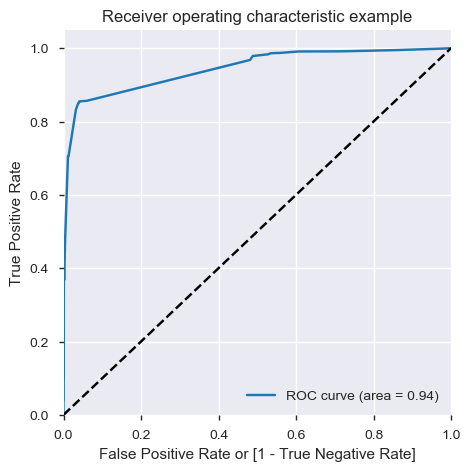

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

### Finding Optimal Cutoff Point

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conv_Prob  ProspectID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0          0   0.000801        1871          0    1    0    0    0    0    0    0    0    0    0
1          0   0.173731        6795          0    1    1    0    0    0    0    0    0    0    0
2          0   0.000801        3516          0    1    0    0    0    0    0    0    0    0    0
3          0   0.284091        8105          0    1    1    1    0    0    0    0    0    0    0
4          0   0.173731        3934          0    1    1    0    0    0    0    0    0    0    0

In [134]:
#Calculating accuracy,sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.668986  0.982968  0.475512
0.2   0.2  0.908318  0.856448  0.940280
0.3   0.3  0.917749  0.855231  0.956272
0.4   0.4  0.919450  0.854826  0.959270
0.5   0.5  0.918677  0.851176  0.960270
0.6   0.6  0.918986  0.851176  0.960770
0.7   0.7  0.918677  0.846310  0.963268
0.8   0.8  0.879716  0.705596  0.987006
0.9   0.9  0.805349  0.497161  0.995252


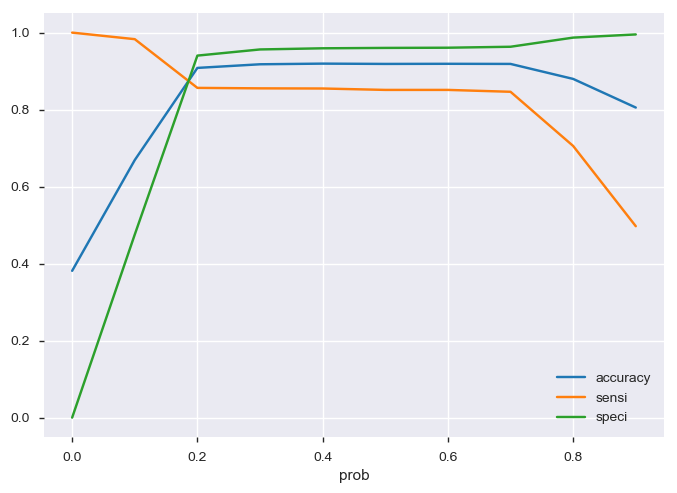

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [136]:
#### From the curve above, 0.18 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.18 else 0)

y_train_pred_final.head()

Converted  Conv_Prob  ProspectID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted
0          0   0.000801        1871          0    1    0    0    0    0    0    0    0    0    0                0
1          0   0.173731        6795          0    1    1    0    0    0    0    0    0    0    0                0
2          0   0.000801        3516          0    1    0    0    0    0    0    0    0    0    0                0
3          0   0.284091        8105          0    1    1    1    0    0    0    0    0    0    0                1
4          0   0.173731        3934          0    1    1    0    0    0    0    0    0    0    0                0

In [137]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conv_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

Converted  Conv_Prob  ProspectID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score
0          0   0.000801        1871          0    1    0    0    0    0    0    0    0    0    0                0           0
1          0   0.173731        6795          0    1    1    0    0    0    0    0    0    0    0                0          17
2          0   0.000801        3516          0    1    0    0    0    0    0    0    0    0    0                0           0
3          0   0.284091        8105          0    1    1    1    0    0    0    0    0    0    0                1          28
4          0   0.173731        3934          0    1    1    0    0    0    0    0    0    0    0                0          17

In [138]:
# Accuracy-
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9081632653061225

In [139]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3762,  240],
       [ 354, 2112]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negative

In [141]:
# Sensitivity 
TP / float(TP+FN)

0.8564476885644768

In [142]:
#Specificity
TN / float(TN+FP)

0.9400299850074962

In [143]:
#False postive rate
print(FP/ float(TN+FP))

0.05997001499250375


In [144]:
#Positive predictive value 
print (TP / float(TP+FP))


0.8979591836734694


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))


0.9139941690962099


# Precision and Recall:

In [146]:
#Confusion matrix:

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3843,  159],
       [ 367, 2099]], dtype=int64)

In [147]:
#Precision:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9295837023914969

In [148]:
#Recall:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.85117599351176

# Precision and Recall Trade-off:

In [149]:
from sklearn.metrics import precision_recall_curve

In [150]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      0
 48      0
 49      1
 50      0
 51      1
 52      1
 53      1
 54      1
 55      0
 56      1
 57      0
 58      1
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      1
 67      1
 68      0
 69      1
 70      1
 71      0
 72      1
 73      0
 74      0
 75      0
 76      1
 77      0
 78      0
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      1
 89      1
 90      1

In [151]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

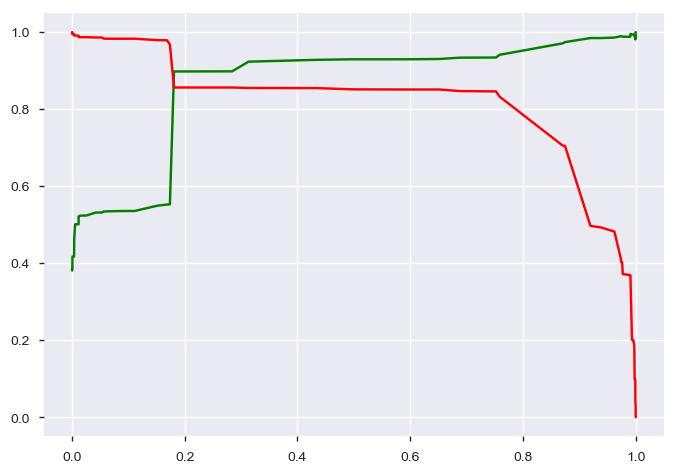

In [152]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [153]:
X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

In [154]:
X_test = X_test[col3]
X_test.head()

What is your current occupation_Working Professional  Tags_Busy  Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  Tags_Will revert after reading the email  Tags_in touch with EINS  Tags_switched off  Lead Quality_Not Sure  Lead Quality_Worst  Lead Source_Welingak Website  Last Notable Activity_SMS Sent
4269                                                  0             0                        0                  0             0                                         1                        0                  0                      1                   0                             0                               1
2376                                                  0             0                        0                  0             0                                         1                        0                  0                      0                   0                             0                               1
7766                                                  1             0                        0                  0             0                                         1                        0                  0                      0                   0                             0                               0
9199                                                  0             0                        0                  0             0                                         0                        0                  0                      1                   0                             0                               0
4359                                                  0             0                        0                  0             0                                         1                        0                  0                      0                   0                             0                               0

In [155]:
X_test_sm = sm.add_constant(X_test)

In [156]:
y_test_pred = res.predict(X_test_sm)

In [157]:
y_test_pred[:10]

4269    0.758598
2376    0.990487
7766    0.962068
9199    0.003765
4359    0.874480
9186    0.990487
1631    0.874480
8963    0.874480
8007    0.173731
5324    0.990487
dtype: float64

In [158]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [159]:
y_pred_1.head()

0
4269  0.758598
2376  0.990487
7766  0.962068
9199  0.003765
4359  0.874480

In [160]:
y_test_df = pd.DataFrame(y_test)

In [161]:
# Putting ProspectID to index
y_test_df['ProspectID'] = y_test_df.index

In [162]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [164]:
y_pred_final.head()

Converted  ProspectID         0
0          1        4269  0.758598
1          1        2376  0.990487
2          1        7766  0.962068
3          0        9199  0.003765
4          1        4359  0.874480

In [165]:
# Renaming the column :
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [166]:
# Rearranging the columns:
y_pred_final = y_pred_final.reindex_axis(['ProspectID','Converted','Conv_Prob'], axis=1)

In [167]:
#Head of y_pred_final
y_pred_final.head()

ProspectID  Converted  Conv_Prob
0        4269          1   0.758598
1        2376          1   0.990487
2        7766          1   0.962068
3        9199          0   0.003765
4        4359          1   0.874480

### Using the probability threshold value of 0.18 on the test dataset to predict if a lead will convert.¶

In [168]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.18 else 0)

In [169]:
y_pred_final.head()

ProspectID  Converted  Conv_Prob  final_predicted
0        4269          1   0.758598                1
1        2376          1   0.990487                1
2        7766          1   0.962068                1
3        9199          0   0.003765                0
4        4359          1   0.874480                1

In [170]:
#Overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9087301587301587

In [171]:
#Adding a 'Lead Score' column :

y_pred_final['Lead_Score'] = y_pred_final.Conv_Prob.map( lambda x: round(x*100))

In [172]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1574,  103],
       [ 150,  945]], dtype=int64)

In [173]:
TP = confusion2[1,1] # True positive.
TN = confusion2[0,0] # True negative.
FP = confusion2[0,1] # False positive.
FN = confusion2[1,0] # Talse negative.

In [174]:
#Sensitivity:
TP / float(TP+FN)

0.863013698630137

In [175]:
# Specificity:
TN / float(TN+FP)

0.9385807990459153

In [176]:
# False postive rate - predicting converted when customer did not convert:
print(FP/ float(TN+FP))

0.06141920095408467


In [177]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9017175572519084


In [178]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9129930394431555


In [179]:
#Precision
Precision = confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
Precision

0.9017175572519084

In [180]:
#Recall

Recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
Recall

0.863013698630137

In [181]:
y_pred_final.head()

ProspectID  Converted  Conv_Prob  final_predicted  Lead_Score
0        4269          1   0.758598                1          76
1        2376          1   0.990487                1          99
2        7766          1   0.962068                1          96
3        9199          0   0.003765                0           0
4        4359          1   0.874480                1          87

In [182]:
y_pred_final

ProspectID  Converted  Conv_Prob  final_predicted  Lead_Score
0           4269          1   0.758598                1          76
1           2376          1   0.990487                1          99
2           7766          1   0.962068                1          96
3           9199          0   0.003765                0           0
4           4359          1   0.874480                1          87
5           9186          1   0.990487                1          99
6           1631          1   0.874480                1          87
7           8963          1   0.874480                1          87
8           8007          0   0.173731                0          17
9           5324          1   0.990487                1          99
10          2558          0   0.173731                0          17
11          8973          0   0.000801                0           0
12          2935          1   0.751920                1          75
13          2907          1   0.758598                1          76
14           957          1   0.874480                1          87
15           493          1   0.874480                1          87
16          3179          1   0.874480                1          87
17          3545          0   0.173731                0          17
18          6140          0   0.173731                0          17
19          4877          1   0.751920                1          75
20          1734          0   0.173731                0          17
21          5319          1   0.874480                1          87
22          6208          0   0.000801                0           0
23          3144          0   0.173731                0          17
24          1264          1   0.173731                0          17
25          1557          1   0.751920                1          75
26          5440          0   0.173731                0          17
27           290          0   0.173731                0          17
28          4952          1   0.758598                1          76
29          1807          0   0.173731                0          17
30          8899          1   0.990487                1          99
31          8522          1   0.975795                1          98
32          5255          1   0.000801                0           0
33          8429          1   0.995557                1         100
34          2884          1   0.758598                1          76
35          2736          0   0.000801                0           0
36          8231          0   0.011834                0           1
37          2061          1   0.990487                1          99
38          1275          0   0.003765                0           0
39          7586          0   0.173731                0          17
40          1200          1   0.990487                1          99
41          5034          0   0.173731                0          17
42          7909          1   0.758598                1          76
43          6874          0   0.005387                0           1
44          8779          0   0.000801                0           0
45           937          0   0.003765                0           0
46          2909          0   0.000801                0           0
47          4467          0   0.011834                0           1
48          2553          0   0.173731                0          17
49          5638          1   0.962068                1          96
50          5235          0   0.173731                0          17
51          8876          0   0.173731                0          17
52          4245          1   0.874480                1          87
53          3854          1   0.990487                1          99
54          7631          1   0.990487                1          99
55          6675          0   0.003959                0           0
56          1903          0   0.003765                0           0
57          4588          0   0.173731                0       